# ABF (Axon Binary File) 

In ABF (Axon Binary File) data, a sweep refers to *a single segment of data collected during an experiment or recording session*. Each sweep typically corresponds to a single measurement cycle, where the recording device captures data points over a defined time period.

Here's how sweeps are used in ABF files:

- **Repeated Cycles:** Experiments may involve repeating the same protocol multiple times to observe how responses change across cycles. Each of these cycles is a sweep.
- **Accessing Data:** ABF files store data in sweeps to allow easy access and comparison between different segments. In the context of Python code using PyABF, each sweep is accessed by its index number, enabling you to analyze them individually.
- **ADC Data:** The data collected in a sweep, such as voltage or current measurements, is stored as ADC (Analog-to-Digital Converter) values, which capture the recorded signal as a series of discrete data points.

So, in summary, a sweep is a cycle of recorded data within an ABF file, letting researchers look at consistent, repeated measurements or stimulus responses over time.

In [3]:
import pyabf

load ABF file

In [2]:
file_path = "abf_data/Cell1_CC_LHb/23615008.abf"
abf = pyabf.ABF(file_path)
print(abf)

ABF (v2.6) with 1 channel (mV), sampled at 20.0 kHz, containing 18 sweeps, having no tags, with a total length of 1.55 minutes, recorded with protocol "pulsos-corrienteLH".


## Access Sweep Data
ABF objects provide access to ABF data by sweep number. Sweep numbers start at zero, and after setting a sweep you can access that sweep’s ADC data with sweepY, DAC simulus waveform / command signal with sweepC, and the time units for the sweep with sweepX.

In the context of analyzing electrophysiological data using ABF (Axon Binary Format) files, the term sweep number refers to a specific segment of data collected during an experiment. Here’s a breakdown of the explanation:

- **Sweep Numbers Start at Zero:** Each sweep (or segment of data) is assigned a unique identifier called a sweep number, which begins at zero. This means that the first sweep recorded in your data file is identified as sweep number 0, the second as sweep number 1, and so on. This zero-based indexing is common in programming and data management.
- **Setting a Sweep:** When analyzing the data, you first need to specify or "set" the sweep number you want to work with. This tells the software which specific segment of data you are interested in.
- **Accessing ADC Data with sweepY:** Once you have set a specific sweep, you can retrieve the corresponding ADC (Analog-to-Digital Converter) data using sweepY. This data represents the continuous electrical signals captured during that sweep, reflecting the physiological activity being measured (e.g., neuron firing).
- **DAC Stimulus Waveform/Command Signal with sweepC:** The sweepC variable allows you to access the DAC (Digital-to-Analog Converter) stimulus waveform or command signals used during the sweep. This data might include any electrical stimuli applied to the preparation, which could influence the recorded responses.
- **Time Units with sweepX:** Finally, sweepX provides the time units associated with the sweep. This data indicates the time intervals at which the ADC data was sampled, allowing researchers to understand the temporal aspects of the recorded signals.
Overall, this structure enables researchers to efficiently access and analyze different components of their experimental data, facilitating a comprehensive understanding of the physiological processes being studied.

In [3]:
abf.setSweep(3) # selecting the fourth sweep in the data file 
                # since sweep numbering starts at zero
print("sweep data (ADC):", abf.sweepY)
print("sweep command (DAC):", abf.sweepC)
print("sweep times (seconds):", abf.sweepX)

sweep data (ADC): [-69.5801 -68.3594 -69.5801 ... -69.2749 -69.2749 -68.9697]
sweep command (DAC): [0. 0. 0. ... 0. 0. 0.]
sweep times (seconds): [0.     0.0001 0.0001 ... 2.9999 2.9999 3.    ]


# Explanation

-------

```
print("sweep data (ADC):", abf.sweepY)
sweep data (ADC): [-69.5801 -68.3594 -69.5801 ... -69.2749 -69.2749 -68.9697]
```
This array provides the DAC stimulus waveform or command signals used during the same sweep. In this case, the output shows that the command signal remained at 0 mV throughout the sweep, indicating that no external stimulus was applied during this recording.

-----

```
print("sweep command (DAC):", abf.sweepC)
sweep command (DAC): [0. 0. 0. ... 0. 0. 0.]
```
This array provides the DAC stimulus waveform or command signals used during the same sweep. In this case, the output shows that the command signal remained at 0 mV throughout the sweep, indicating that no external stimulus was applied during this recording.

-----

```
print("sweep times (seconds):", abf.sweepX)
sweep times (seconds): [0.     0.0001 0.0001 ... 2.9999 2.9999 3.    ]
```
This array lists the time points (in seconds) at which the ADC data was sampled during sweep number 3. The timestamps indicate that data was collected at intervals, with values showing that the first sample was at 0 seconds, and subsequent samples were taken every 0.0001 seconds, continuing up to 3 seconds.

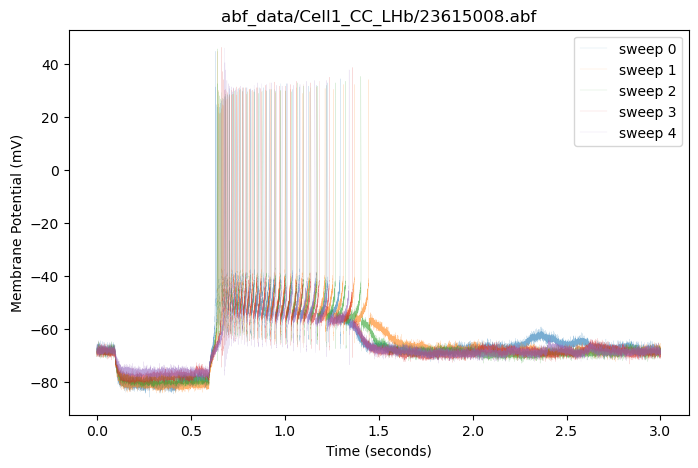

In [4]:
import matplotlib.pyplot as plt
abf.setSweep(1)
plt.figure(figsize=(8, 5))
plt.title(file_path)
plt.ylabel(abf.sweepLabelY)
plt.xlabel(abf.sweepLabelX)
for i in [0, 1, 2, 3, 4]:
    abf.setSweep(i)
    plt.plot(abf.sweepX, abf.sweepY, alpha=.6,lw=0.1, label="sweep %d" % (i))
plt.legend()
plt.show()

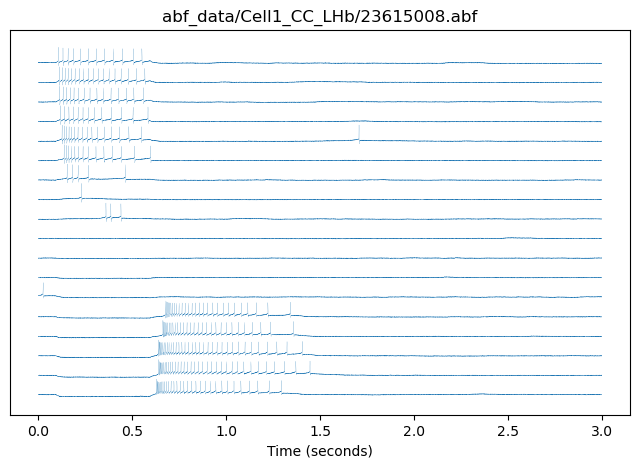

In [5]:
plt.figure(figsize=(8, 5))

# plot every sweep (with vertical offset)
for sweepNumber in abf.sweepList:
    abf.setSweep(sweepNumber)
    offset = 140*sweepNumber
    plt.plot(abf.sweepX, abf.sweepY+offset, color='b',lw=0.1)

# decorate the plot
plt.gca().get_yaxis().set_visible(False)  # hide Y axis
plt.title(file_path)
plt.xlabel(abf.sweepLabelX)
plt.show()

In [6]:
abf.sweepList

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

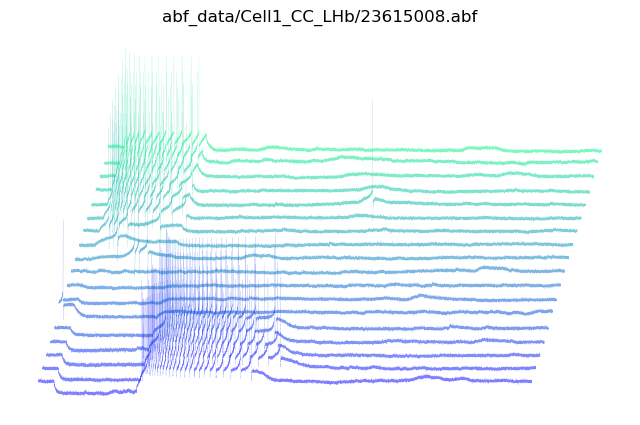

In [7]:
# use a custom colormap to create a different color for every sweep
cm = plt.get_cmap("winter")
colors = [cm(x/abf.sweepCount) for x in abf.sweepList]
# colors.reverse()

plt.figure(figsize=(8, 5))
for sweepNumber in abf.sweepList:
    abf.setSweep(sweepNumber)
    i1, i2 = 0, int(abf.sampleRate * 10)
    dataX = abf.sweepX[i1:i2] + .025 * sweepNumber
    dataY = abf.sweepY[i1:i2] + 15 * sweepNumber
    plt.plot(dataX, dataY, color=colors[sweepNumber], alpha=.5, lw=0.1)

plt.title(file_path)
plt.gca().axis('off')
plt.show()

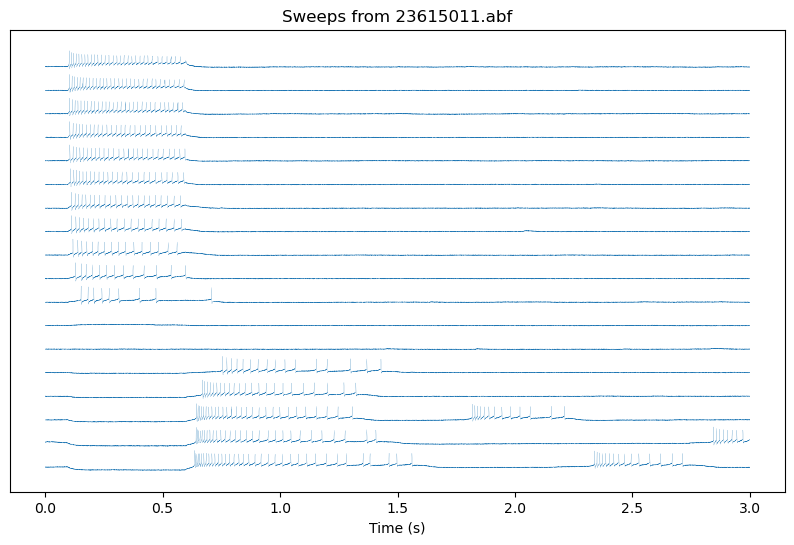

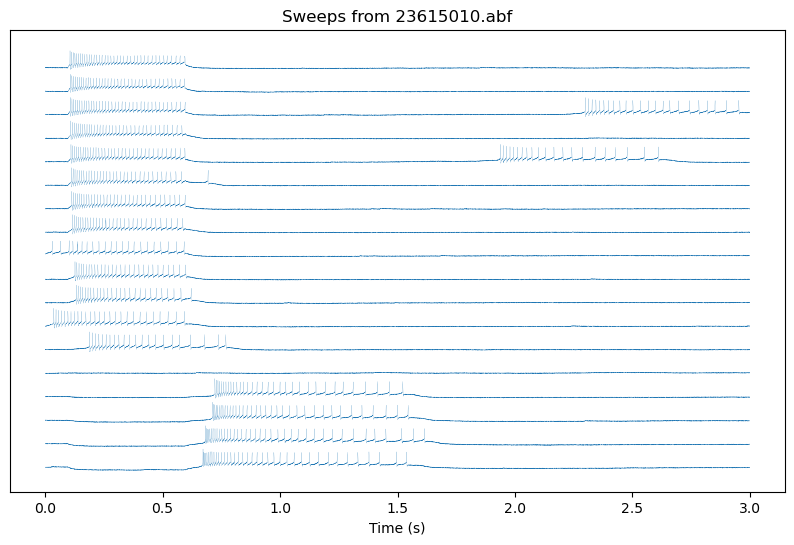

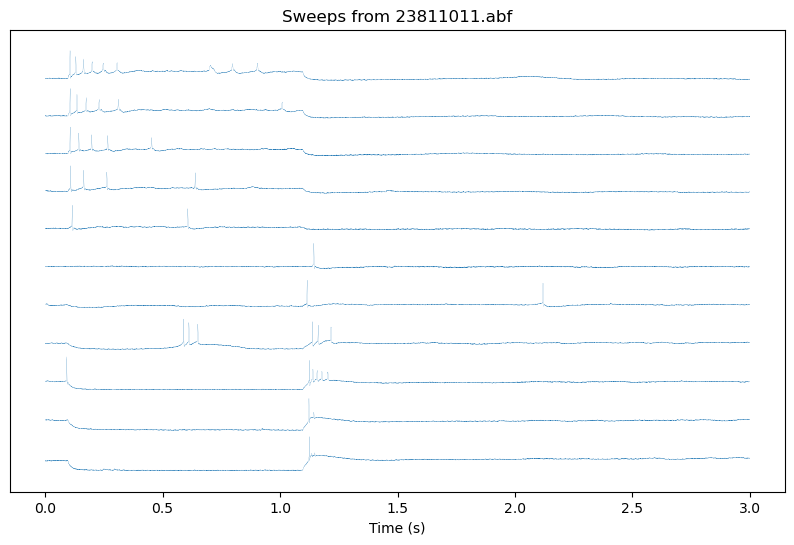

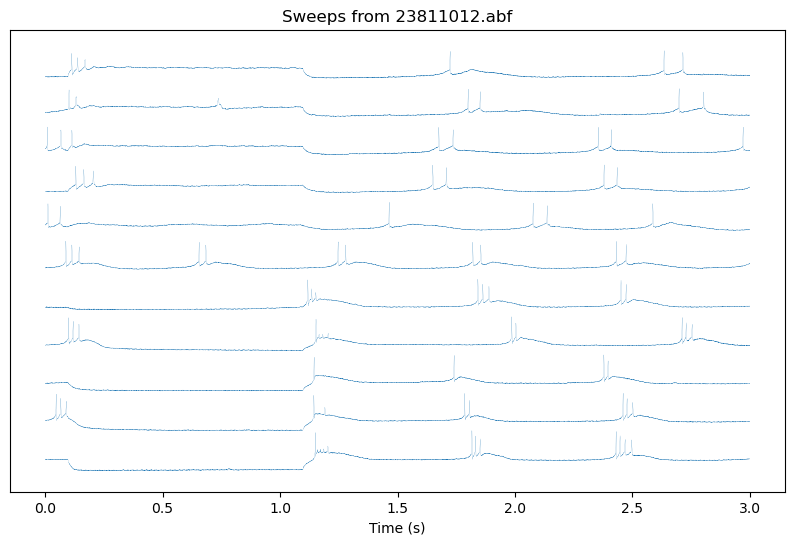

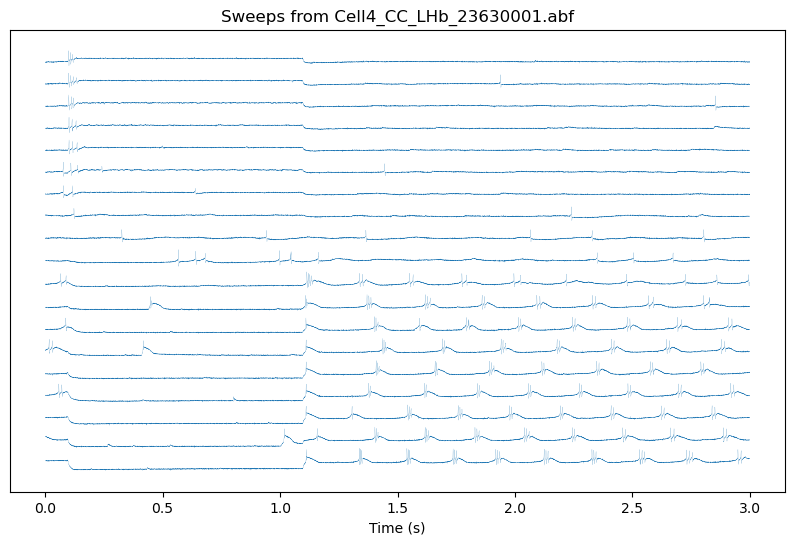

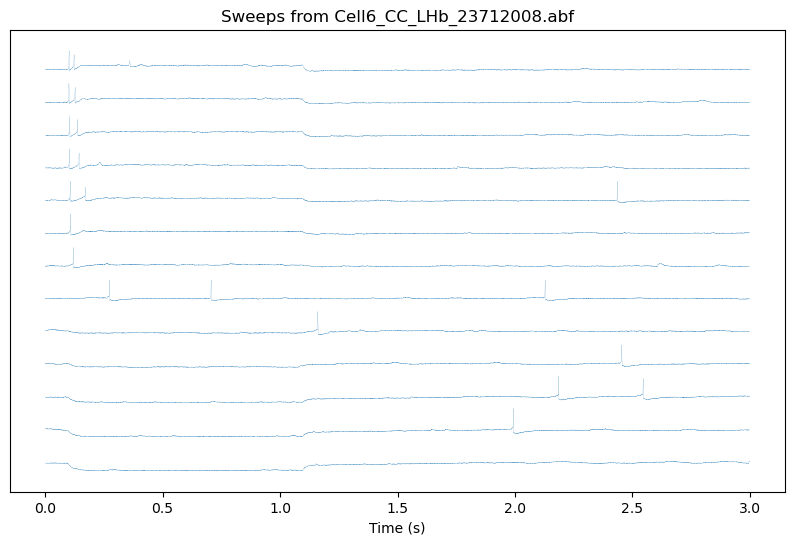

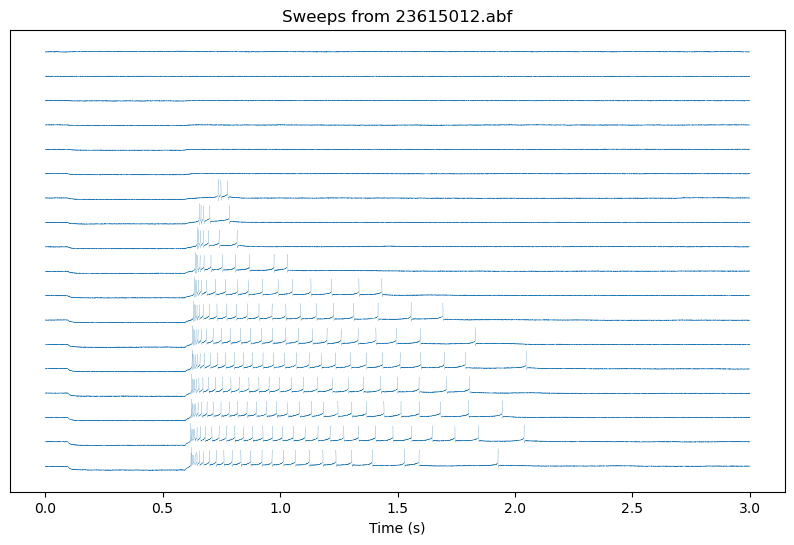

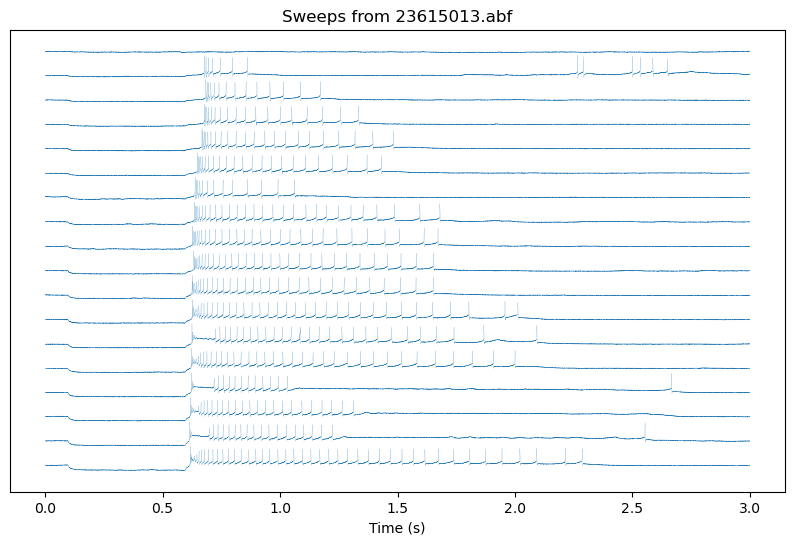

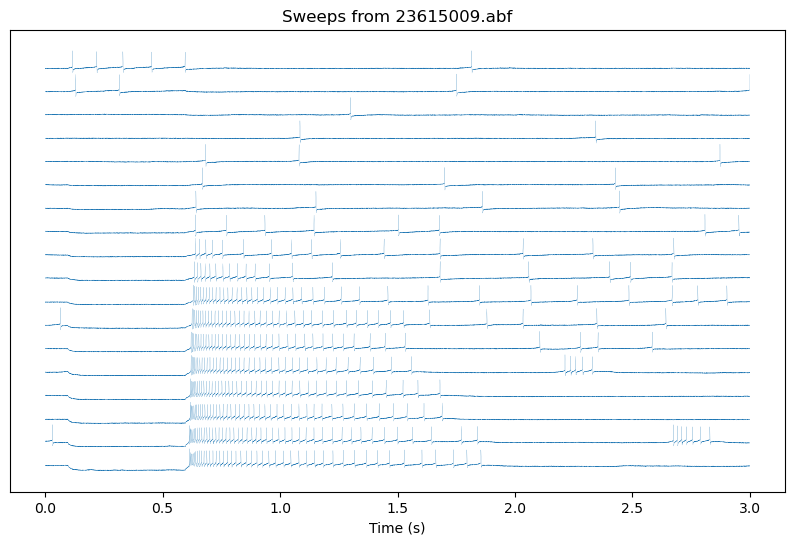

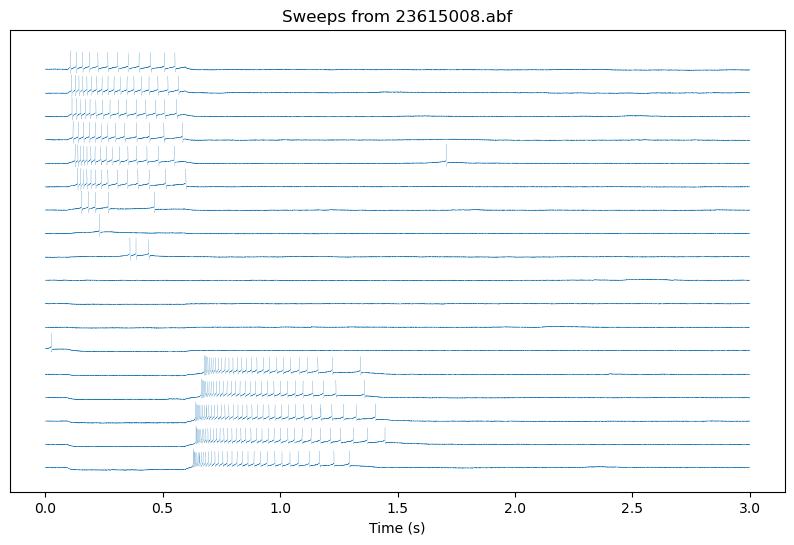

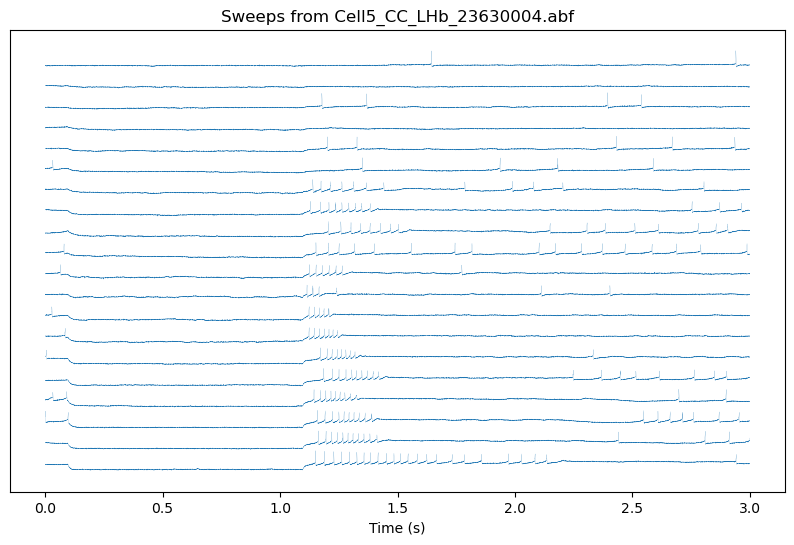

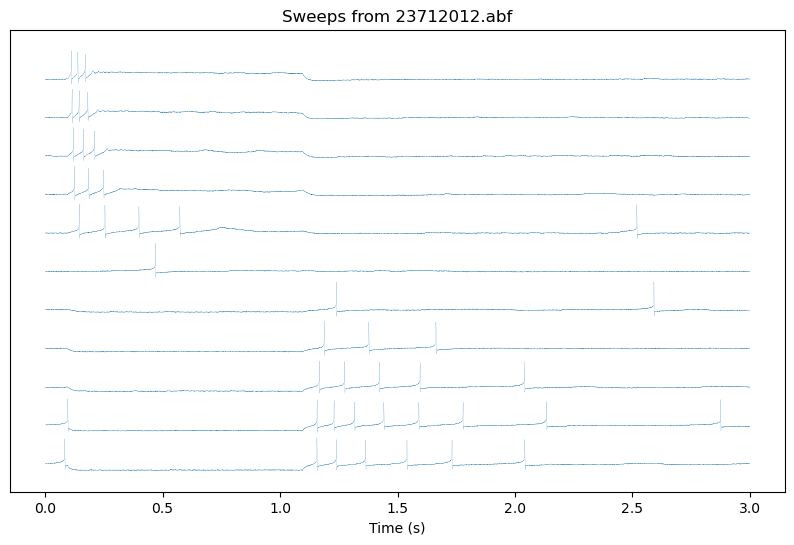

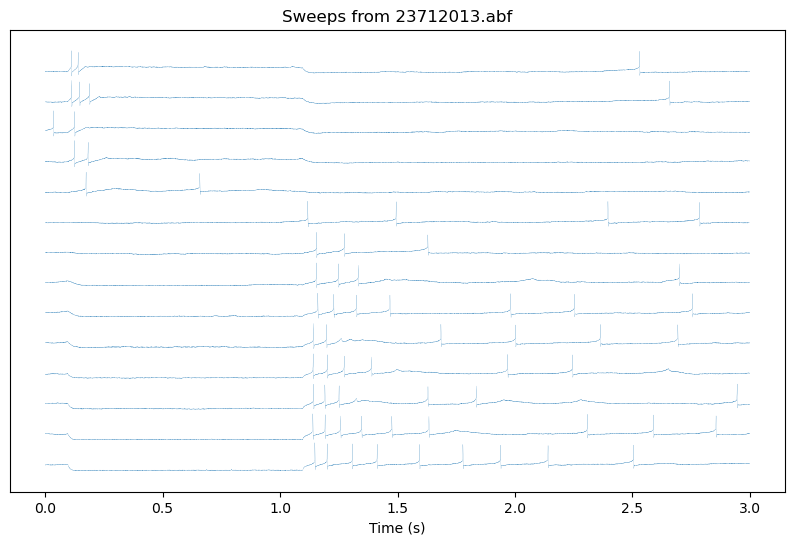

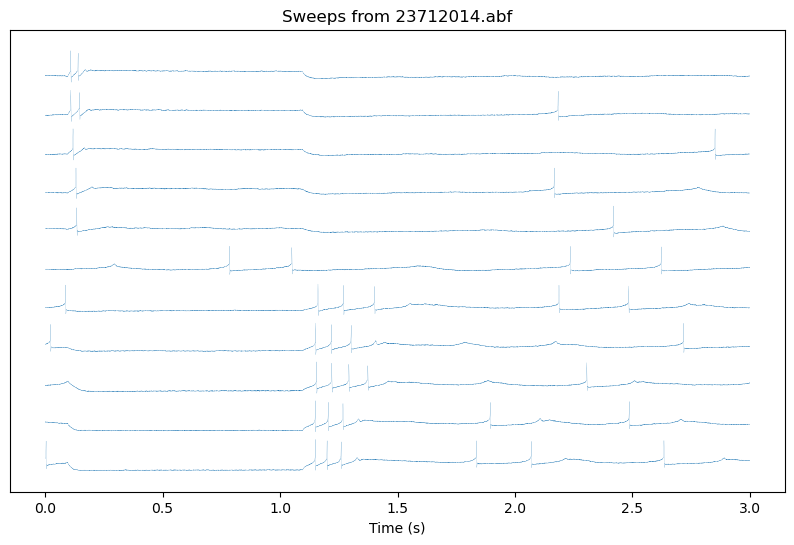

In [8]:
import os

# Set the base directory to search for ABF files
base_directory = "abf_data/"

# Loop through all subdirectories and files in the base directory
for dirpath, _, filenames in os.walk(base_directory):
    for filename in filenames:
        if filename.endswith('.abf'):  # Check if the file is an ABF file
            abf_path = os.path.join(dirpath, filename)  # Get the full path of the ABF file
            abf = pyabf.ABF(abf_path)  # Load the ABF file
            
            # Create a new figure for each ABF file
            plt.figure(figsize=(10, 6))
            plt.title(f"Sweeps from {filename}")  # Set the title to the ABF file name
            plt.xlabel("Time (s)")
            plt.ylabel("ADC Data")

            # Plotting each sweep
            for sweepNumber in abf.sweepList:
                abf.setSweep(sweepNumber)
                offset = 140 * sweepNumber
                plt.plot(abf.sweepX, abf.sweepY + offset, color='b', lw=0.1)
                plt.gca().get_yaxis().set_visible(False)  # hide Y axis


            # Show or save the plot for the current ABF file
            plt.show()  # Use plt.savefig(abf_path + '.png') to save the figure instead

            # Optional: close the figure after showing/saving
            plt.close()


In [11]:
#!/usr/bin/env python3

import pyabf
import os
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Set the base directory to search for ABF files
base_directory = "abf_data/"

# Create a PDF file to save all figures
pdf_path = "abf_figures.pdf"
with PdfPages(pdf_path) as pdf:
    # Initialize a counter for the number of plots on the current page
    plot_counter = 0

    # Loop through all subdirectories and files in the base directory
    for dirpath, _, filenames in os.walk(base_directory):
        for filename in filenames:
            if filename.endswith('.abf'):  # Check if the file is an ABF file
                abf_path = os.path.join(dirpath, filename)  # Get the full path of the ABF file
                abf = pyabf.ABF(abf_path)  # Load the ABF file

                # Check if a new page is needed
                if plot_counter % 3 == 0:
                    plt.figure(figsize=(8.5, 11))  # Portrait format (8.5 x 11 inches)

                # Create a subplot for the current figure
                relative_path = os.path.relpath(abf_path, base_directory)  # Get the relative path
                plt.subplot(3, 1, plot_counter % 3 + 1)  # 3 rows, 1 column
                plt.title(f"Sweeps from {relative_path}", pad=20)  # Set the title to the relative path with padding
                plt.xlabel("Time (s)")
                plt.ylabel("ADC Data")

                # Plotting each sweep
                for sweepNumber in abf.sweepList:
                    abf.setSweep(sweepNumber)
                    offset = 140 * sweepNumber
                    plt.plot(abf.sweepX, abf.sweepY + offset, color='b', lw=0.1)
                    plt.gca().get_yaxis().set_visible(False)  # hide Y axis

                plot_counter += 1  # Increment the plot counter

                # Adjust the layout to prevent overlap
                plt.tight_layout()

                # Save the current figure to the PDF if we've reached 3 plots
                if plot_counter % 3 == 0 or (dirpath == list(os.walk(base_directory))[0][0] and plot_counter == len(filenames)):
                    pdf.savefig()  # Save the current figure to the PDF
                    plt.close()    # Close the figure to save memory

    # Check if there are any remaining plots to save after the loop
    if plot_counter % 3 != 0:
        pdf.savefig()  # Save the remaining figure(s)
        plt.close()    # Close the figure to save memory

# Optionally inform the user that the PDF has been created
print(f"All figures saved to {pdf_path}.")

All figures saved to abf_figures.pdf.


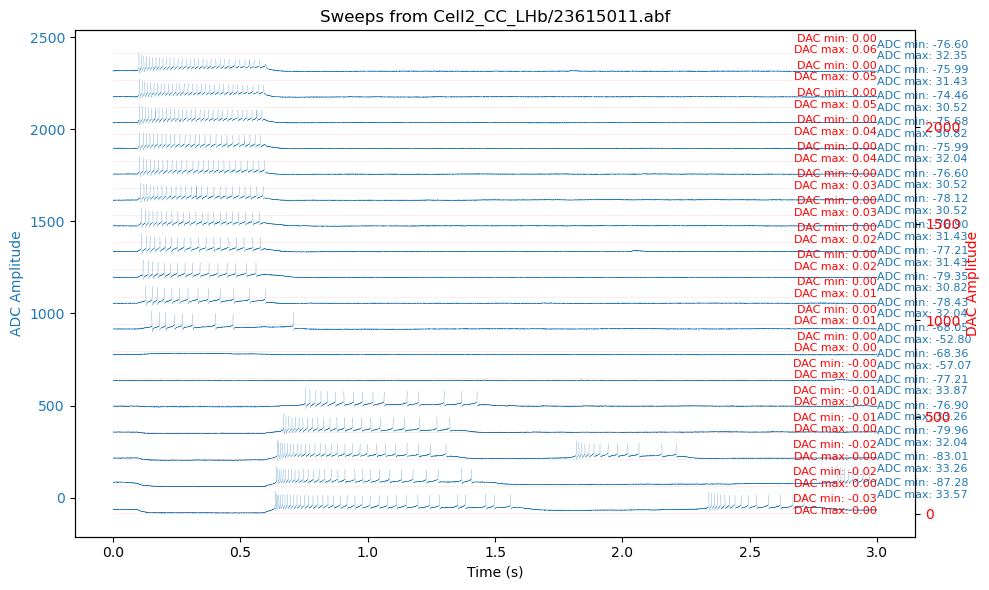

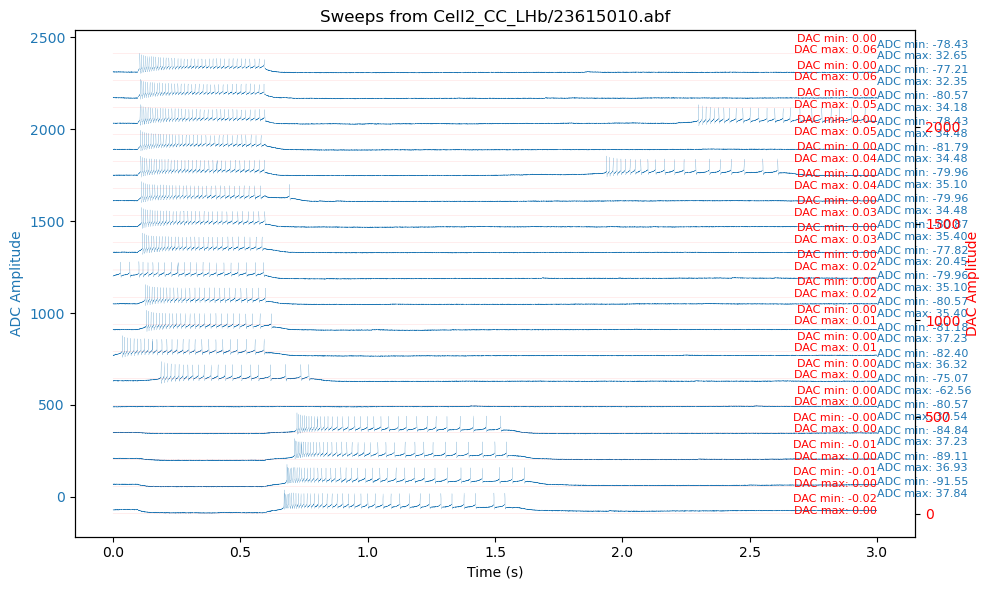

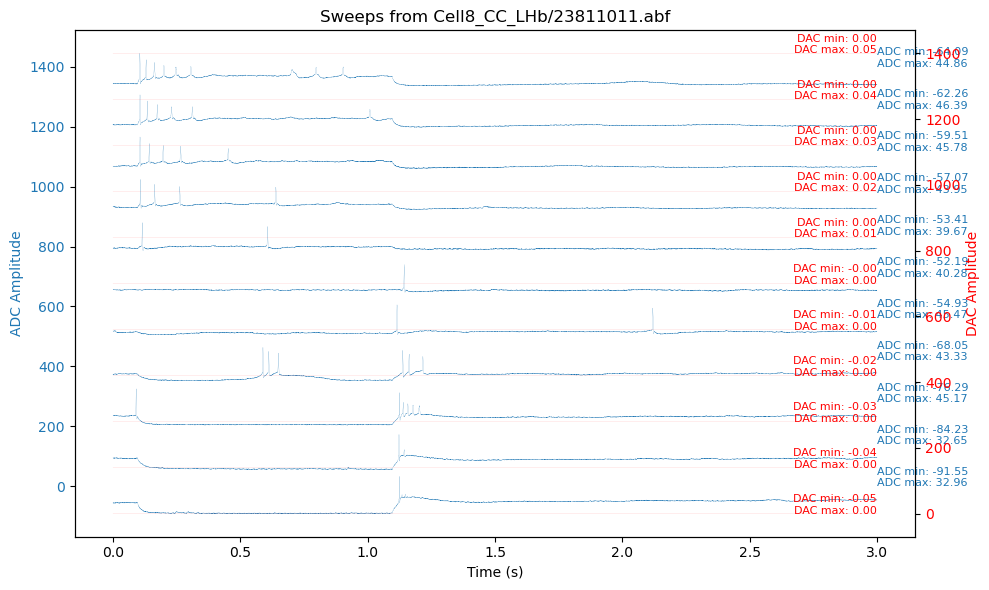

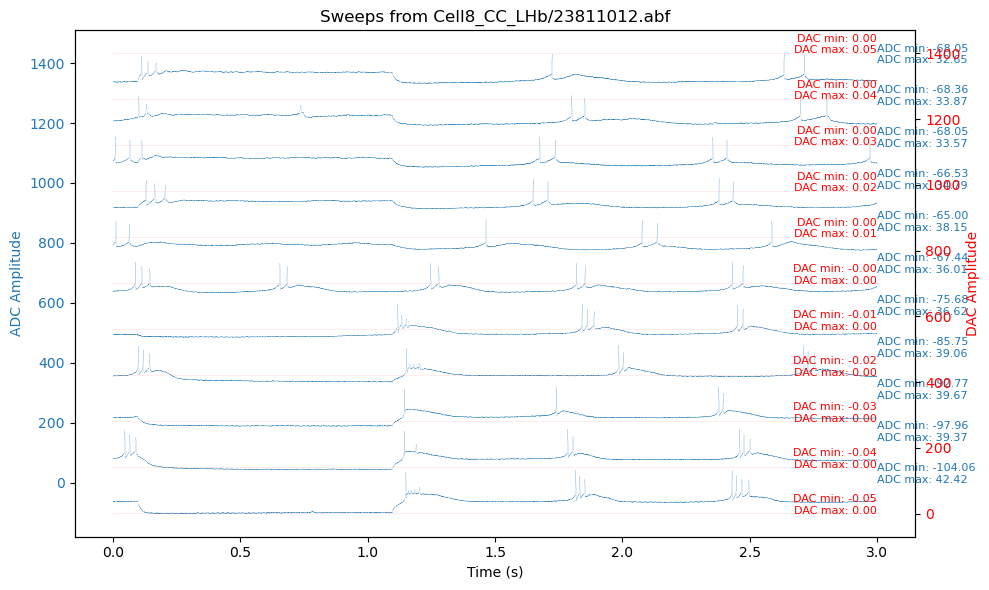

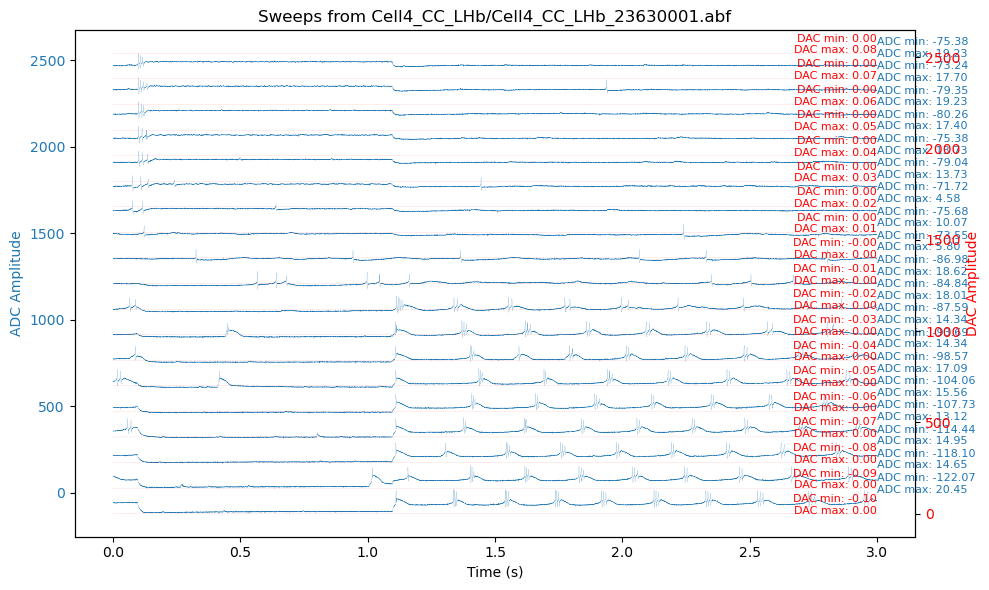

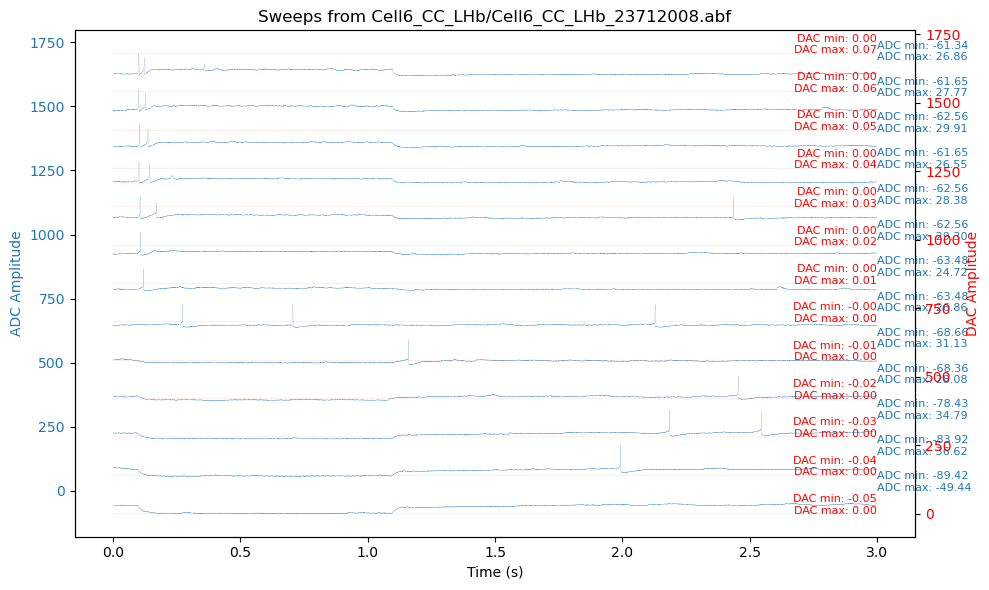

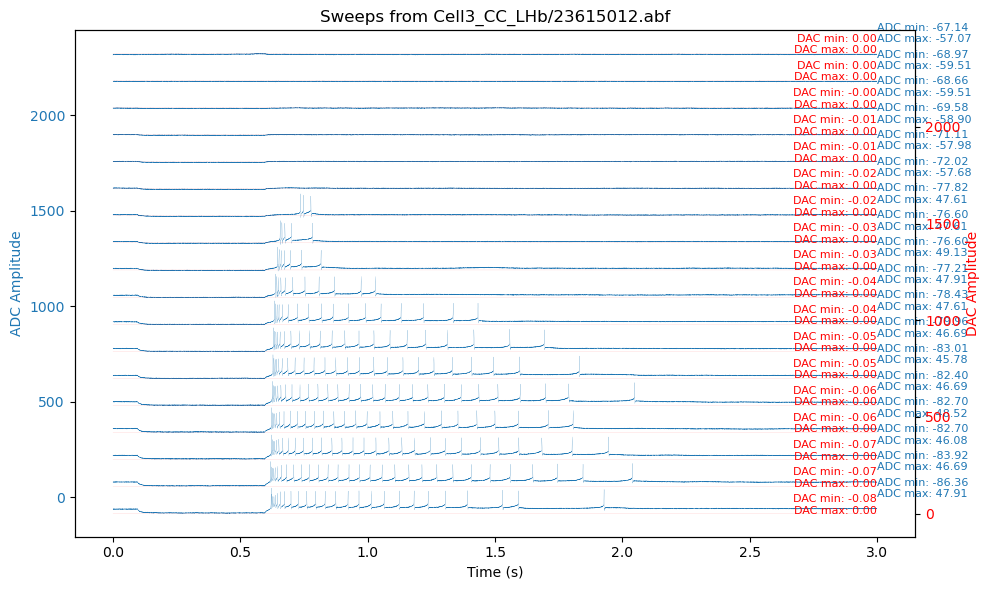

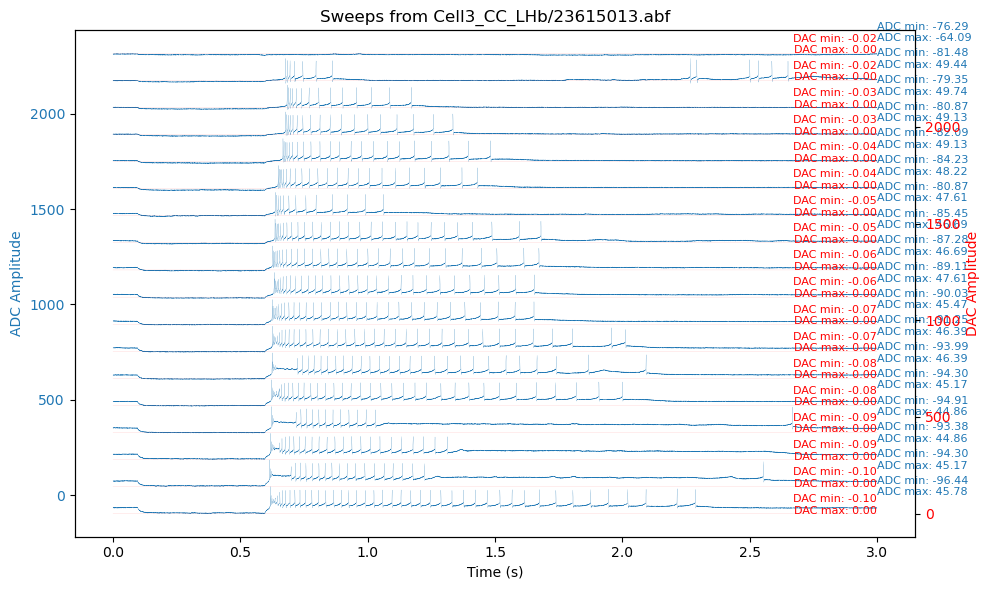

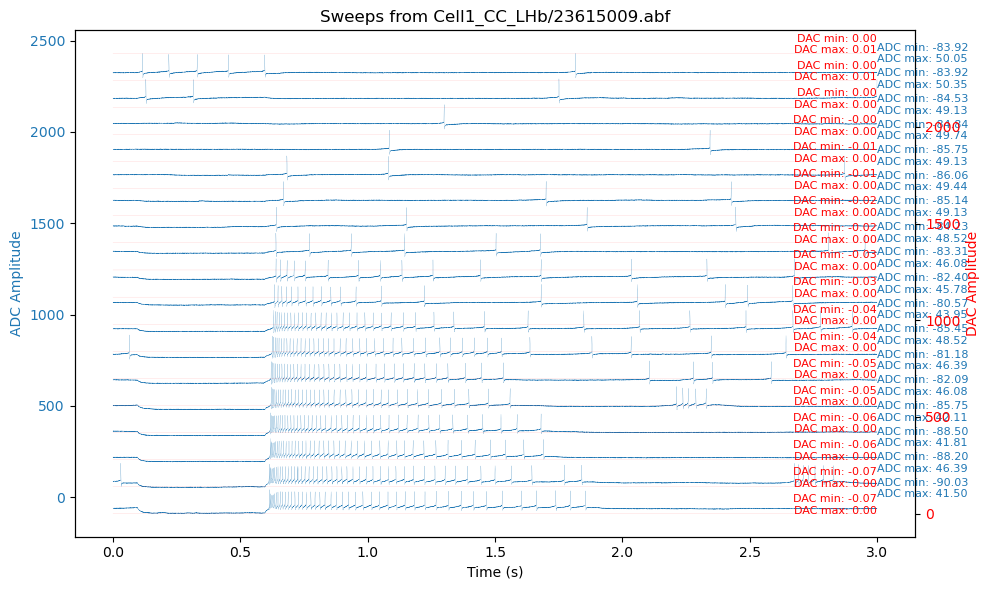

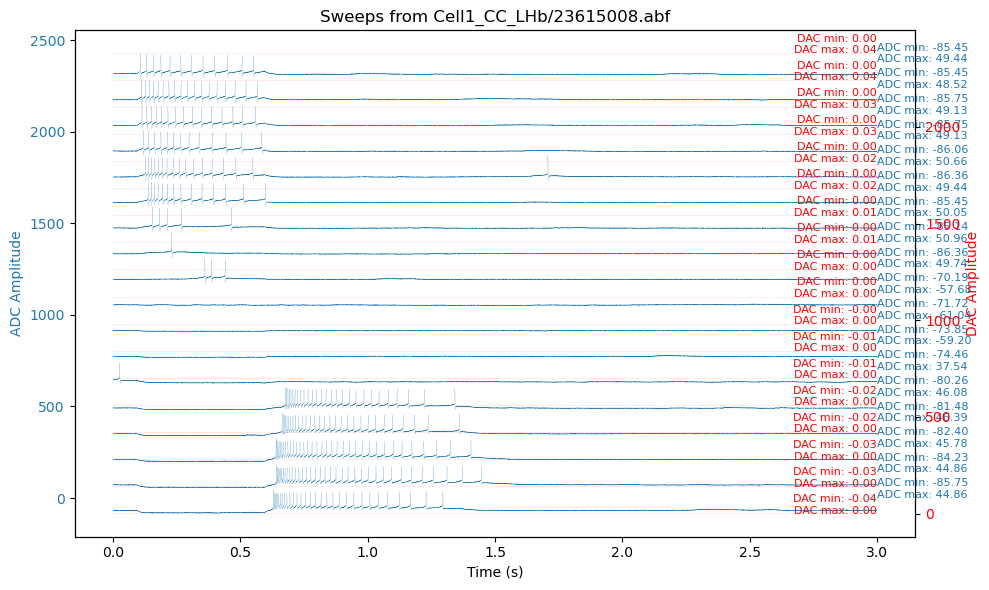

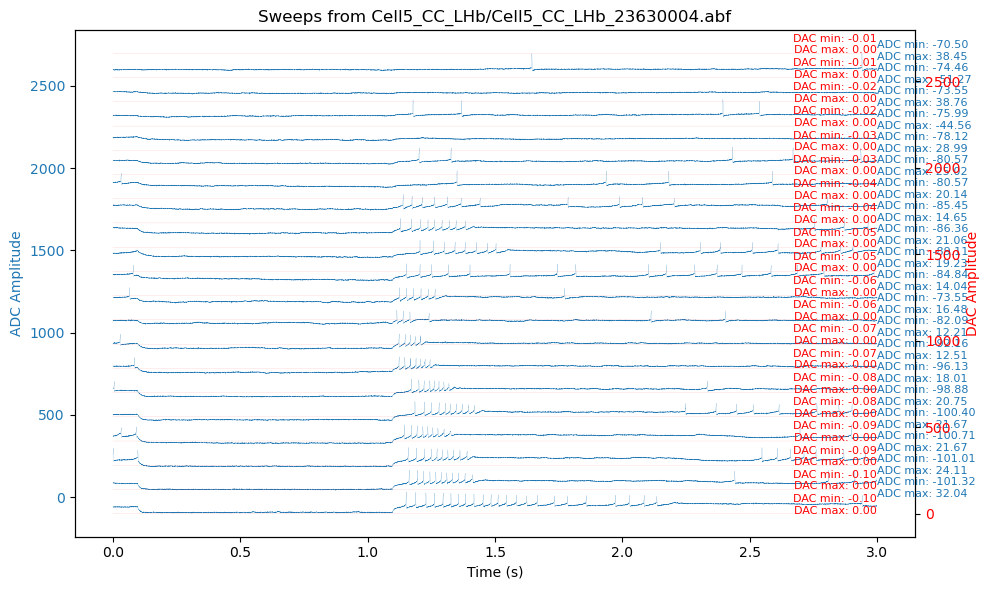

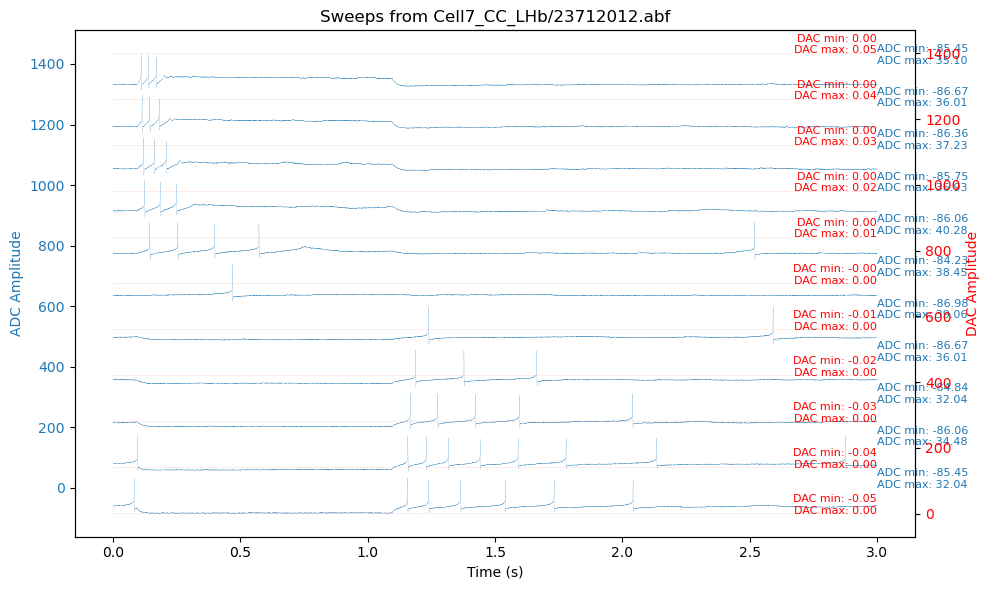

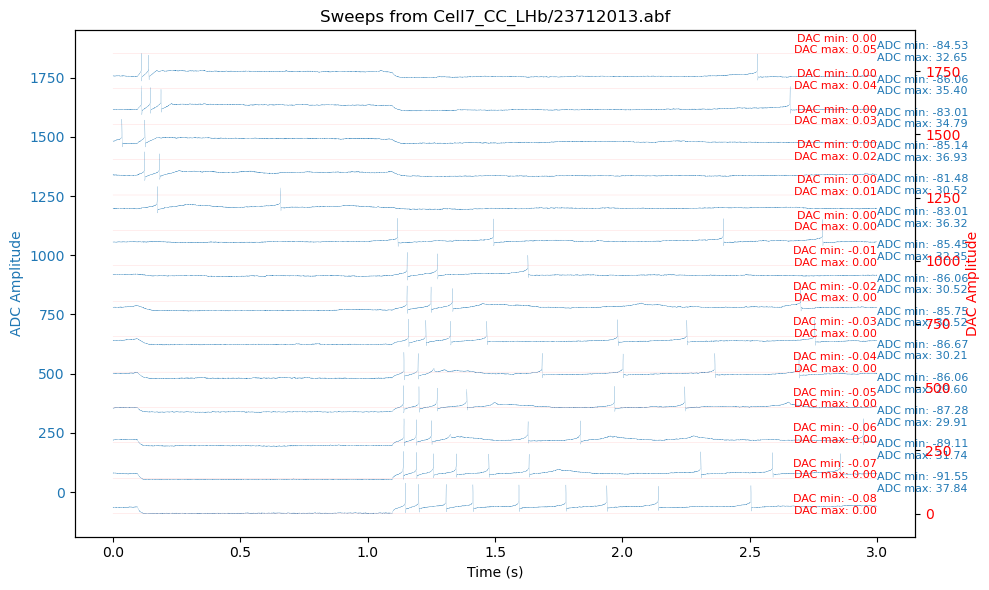

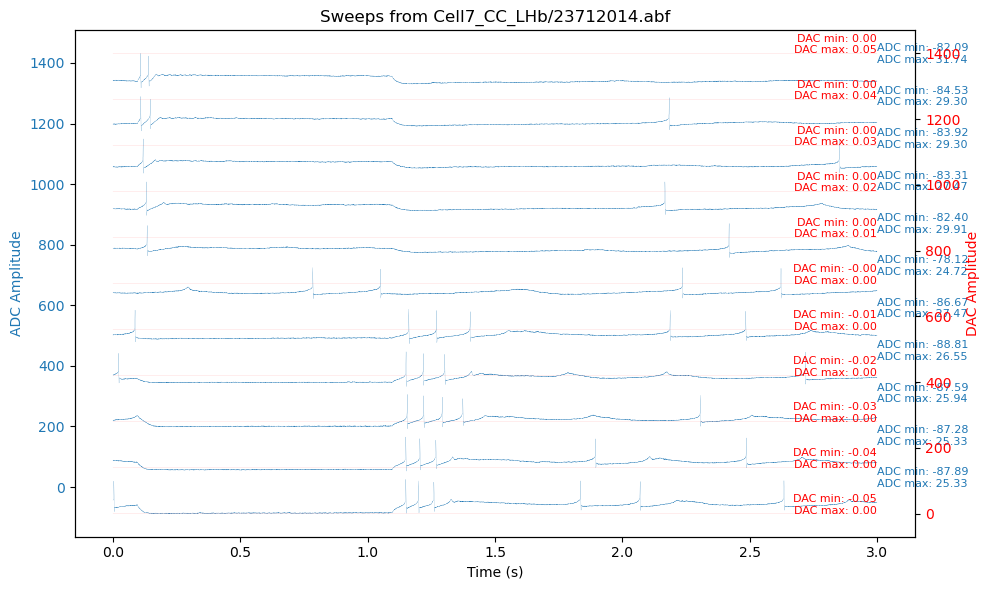

In [11]:
import os
import pyabf
import matplotlib.pyplot as plt

# Base directory to search for ABF files
base_directory = "abf_data/"

# Loop through all subdirectories and files in the base directory
for dirpath, _, filenames in os.walk(base_directory):
    for filename in filenames:
        if filename.endswith('.abf'):  # Check if the file is an ABF file
            abf_path = os.path.join(dirpath, filename)  # Get the full path of the ABF file
            abf = pyabf.ABF(abf_path)  # Load the ABF file

            # Create a new figure and primary y-axis for ADC
            fig, ax1 = plt.subplots(figsize=(10, 6))
            relative_path = os.path.relpath(abf_path, base_directory)  # Get the relative path
            ax1.set_title(f"Sweeps from {relative_path}")
            ax1.set_xlabel("Time (s)")
            ax1.set_ylabel("ADC Amplitude", color='b')
            ax1.tick_params(axis='y', labelcolor='b')

            # Create a second y-axis for DAC
            ax2 = ax1.twinx()
            ax2.set_ylabel("DAC Amplitude", color='r')
            ax2.tick_params(axis='y', labelcolor='r')

            # Plotting ADC and DAC data for each sweep
            for sweepNumber in abf.sweepList:
                abf.setSweep(sweepNumber)
                offset = 140 * sweepNumber  # Offset for visualization

                # Plot ADC data with an offset and find min/max
                ax1.plot(abf.sweepX, abf.sweepY + offset, color='b', lw=0.1, label="ADC" if sweepNumber == 0 else "")
                adc_min = abf.sweepY.min()
                adc_max = abf.sweepY.max()
                ax1.annotate(f'ADC min: {adc_min:.2f}\nADC max: {adc_max:.2f}', 
                             xy=(abf.sweepX[-1], offset), color='b', fontsize=8, ha='left')

                # Plot DAC data with an offset and find min/max
                ax2.plot(abf.sweepX, abf.sweepC + offset, color='r', alpha=0.5, lw=0.1, label="DAC" if sweepNumber == 0 else "")
                dac_min = abf.sweepC.min()
                dac_max = abf.sweepC.max()
                ax2.annotate(f'DAC min: {dac_min:.2f}\nDAC max: {dac_max:.2f}', 
                             xy=(abf.sweepX[-1], offset), color='r', fontsize=8, ha='right')

            # Adjust layout and display the plot
            fig.tight_layout()
            plt.show()
            plt.close()


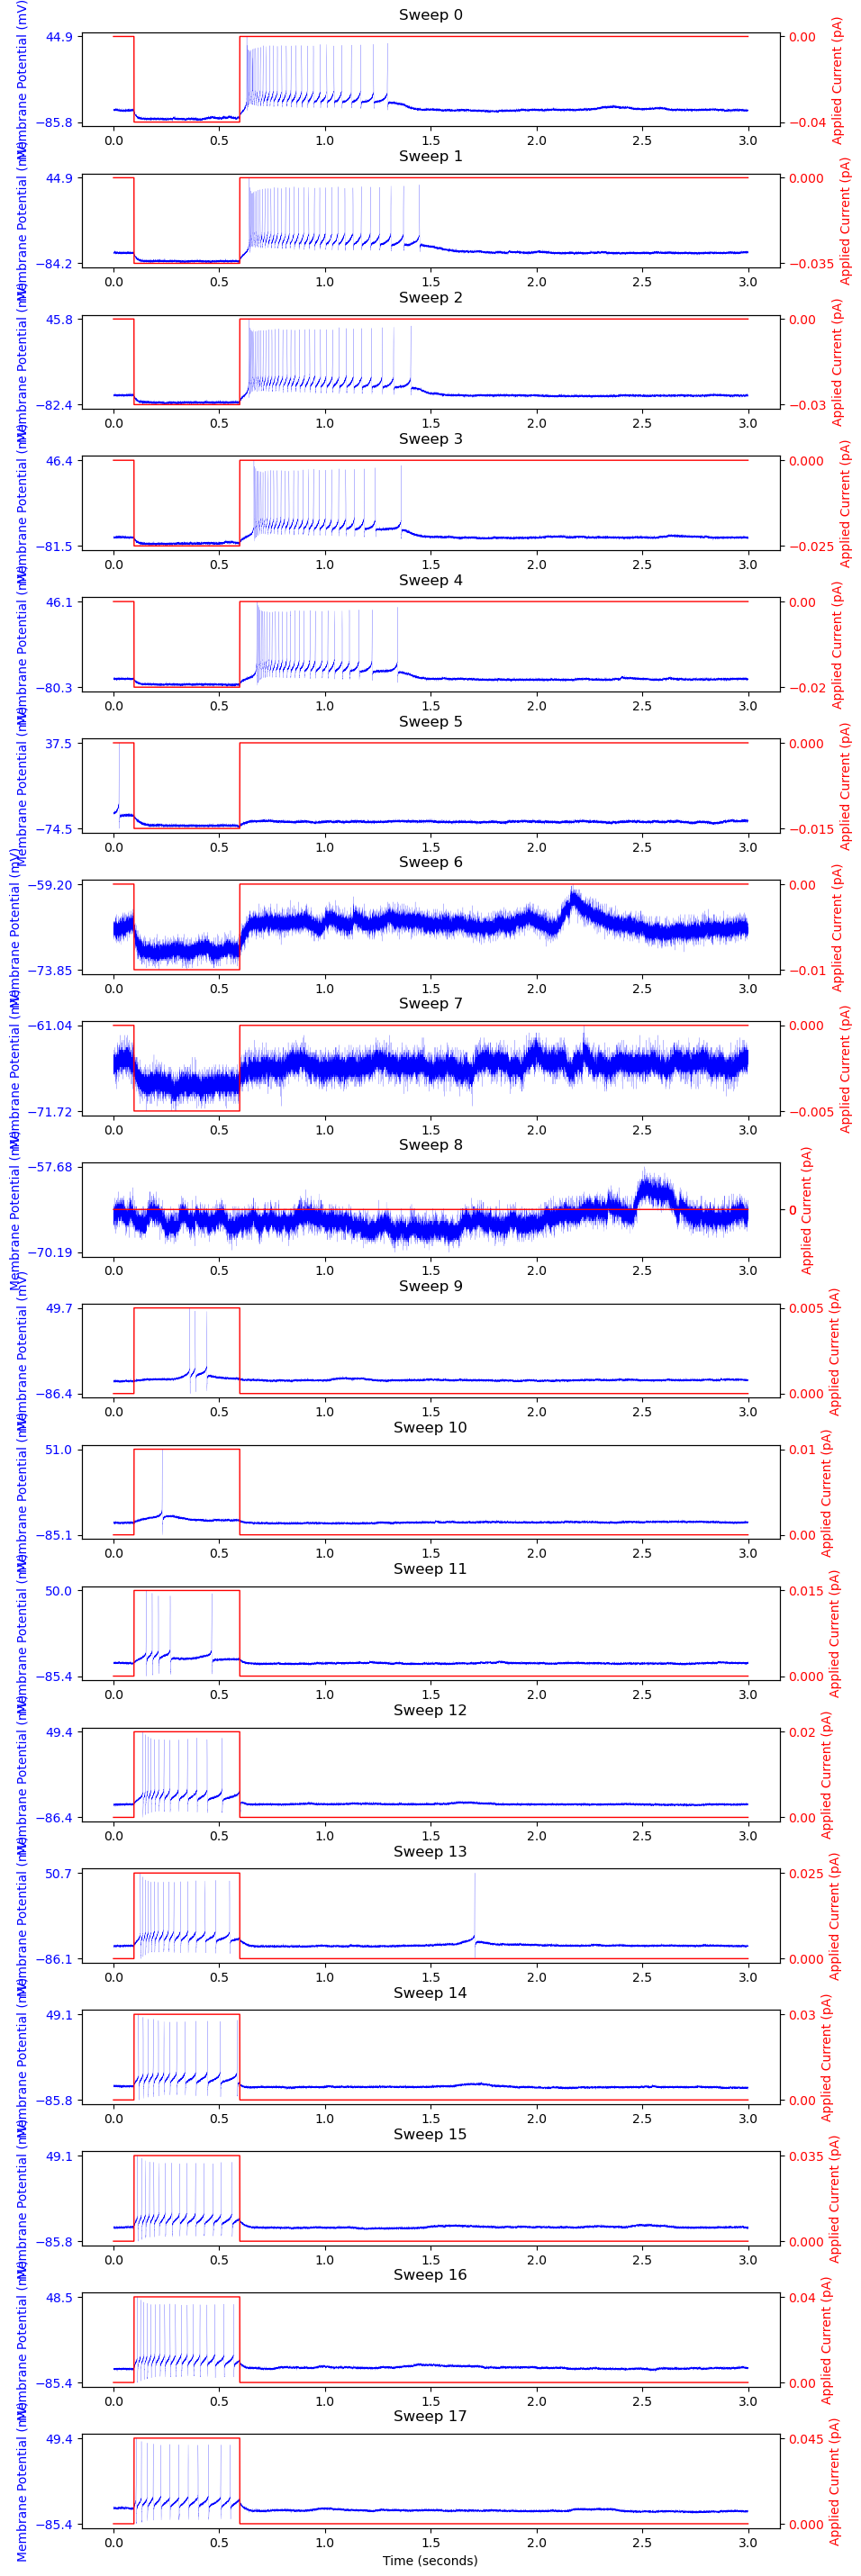

In [41]:
import os
import pyabf
import matplotlib.pyplot as plt
import numpy as np

# Charger le fichier ABF
file_path = "abf_data/Cell1_CC_LHb/23615008.abf"
abf = pyabf.ABF(file_path)

# Définir le nombre de sous-figures (nombre de sweeps)
n_sweeps = len(abf.sweepList)
fig, axes = plt.subplots(nrows=n_sweeps, ncols=1, figsize=(10, 2 * n_sweeps))

# Assurez-vous que 'axes' soit un tableau, même pour un seul sweep
if n_sweeps == 1:
    axes = [axes]

# Tracer chaque sweep individuellement
for i, sweepNumber in enumerate(abf.sweepList):
    abf.setSweep(sweepNumber)
    ax1 = axes[i]
    ax2 = ax1.twinx()

    # Tracer l'ADC (potentiel de membrane) sur l'axe de gauche
    ax1.plot(abf.sweepX, abf.sweepY, color='b', lw=0.1, label="ADC")
    ax1.set_ylabel(abf.sweepLabelY, color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    # Calculer et afficher les valeurs min et max pour l'ADC
    y_min_left = np.min(abf.sweepY)
    y_max_left = np.max(abf.sweepY)
    ax1.set_yticks([y_min_left, y_max_left])
    ax1.set_title(f"Sweep {sweepNumber}", pad=10)  # Ajout d'un espace pour éviter le chevauchement

    # Tracer le DAC (courant appliqué) sur l'axe de droite
    ax2.plot(abf.sweepX, abf.sweepC, color='r', lw=1, label="DAC")
    ax2.set_ylabel(abf.sweepLabelC, color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    # Calculer et afficher les valeurs min et max pour le DAC
    y_min_right = np.min(abf.sweepC)
    y_max_right = np.max(abf.sweepC)
    ax2.set_yticks([y_min_right, y_max_right])

    # Ajuster les étiquettes d'axe x uniquement sur le dernier plot
    if i == n_sweeps - 1:
        ax1.set_xlabel(abf.sweepLabelX)

# Améliorer la mise en page et ajouter de l'espace entre les sous-figures
plt.subplots_adjust(hspace=0.5)

plt.show()


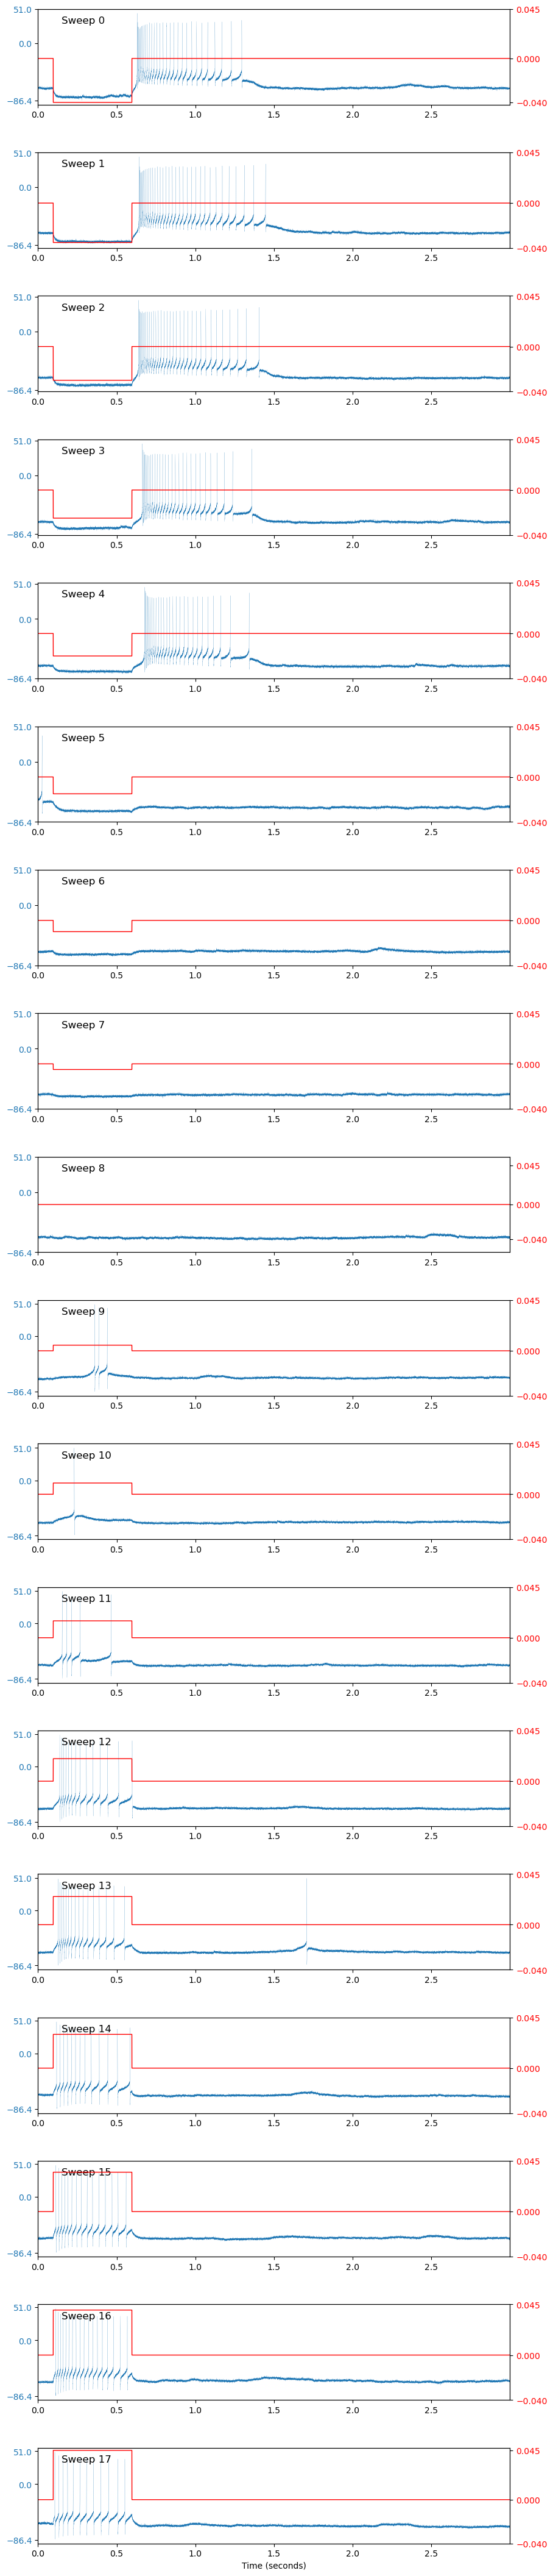

In [21]:
import os
import pyabf
import matplotlib.pyplot as plt
import numpy as np

# Charger le fichier ABF
file_path = "abf_data/Cell1_CC_LHb/23615008.abf"
abf = pyabf.ABF(file_path)

# Initialiser les valeurs globales min et max pour ADC et DAC
global_y_min_left = float('inf')
global_y_max_left = float('-inf')
global_y_min_right = float('inf')
global_y_max_right = float('-inf')

# Trouver les valeurs min et max globales pour tous les sweeps
for sweepNumber in abf.sweepList:
    abf.setSweep(sweepNumber)
    global_y_min_left = min(global_y_min_left, np.min(abf.sweepY))
    global_y_max_left = max(global_y_max_left, np.max(abf.sweepY))
    global_y_min_right = min(global_y_min_right, np.min(abf.sweepC))
    global_y_max_right = max(global_y_max_right, np.max(abf.sweepC))

# Définir le nombre de sous-figures (nombre de sweeps)
n_sweeps = len(abf.sweepList)
fig, axes = plt.subplots(nrows=n_sweeps, ncols=1, figsize=(10, 3 * n_sweeps))

# Assurez-vous que 'axes' soit un tableau, même pour un seul sweep
if n_sweeps == 1:
    axes = [axes]

# Tracer chaque sweep individuellement
for i, sweepNumber in enumerate(abf.sweepList):
    abf.setSweep(sweepNumber)
    ax1 = axes[i]
    ax2 = ax1.twinx()

    # Tracer l'ADC (potentiel de membrane) sur l'axe de gauche
    ax1.plot(abf.sweepX, abf.sweepY, color='b', lw=0.1)
    ax1.set_yticks([global_y_min_left, 0 if global_y_min_left < 0 < global_y_max_left else None, global_y_max_left])
    ax1.set_yticks([tick for tick in ax1.get_yticks() if tick is not None])  # Remove None values
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.set_xlim([abf.sweepX[0], abf.sweepX[-1]])

    # Tracer le DAC (courant appliqué) sur l'axe de droite
    ax2.plot(abf.sweepX, abf.sweepC, color='r', lw=1)
    ax2.set_yticks([global_y_min_right, 0 if global_y_min_right < 0 < global_y_max_right else None, global_y_max_right])
    ax2.set_yticks([tick for tick in ax2.get_yticks() if tick is not None])  # Remove None values
    ax2.tick_params(axis='y', labelcolor='r')

    # Ajouter le numéro de sweep comme titre
    ax1.text(0.05, 0.85, f"Sweep {sweepNumber}", transform=ax1.transAxes, fontsize=12, color='black')

    # Ajuster les étiquettes d'axe x uniquement sur le dernier plot
    if i == n_sweeps - 1:
        ax1.set_xlabel(abf.sweepLabelX)

# Améliorer la mise en page et ajouter de l'espace entre les sous-figures
plt.subplots_adjust(hspace=0.5)
plt.show()


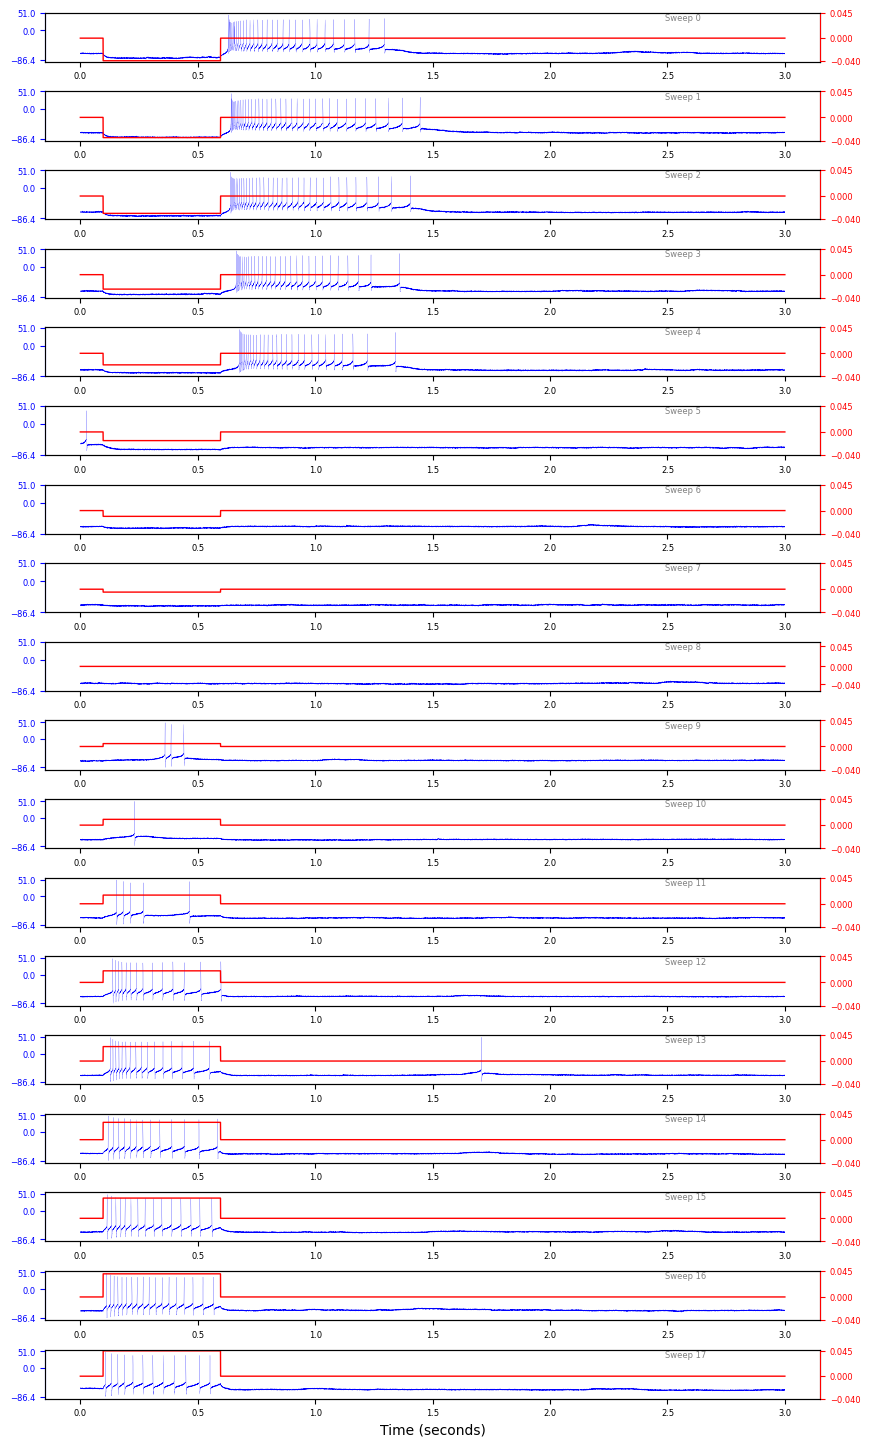

In [47]:
import os
import pyabf
import matplotlib.pyplot as plt
import numpy as np

# Charger le fichier ABF
file_path = "abf_data/Cell1_CC_LHb/23615008.abf"
abf = pyabf.ABF(file_path)

# Initialiser les valeurs globales min et max pour ADC et DAC
global_y_min_left = float('inf')
global_y_max_left = float('-inf')
global_y_min_right = float('inf')
global_y_max_right = float('-inf')

# Trouver les valeurs min et max globales pour tous les sweeps
for sweepNumber in abf.sweepList:
    abf.setSweep(sweepNumber)
    global_y_min_left = min(global_y_min_left, np.min(abf.sweepY))
    global_y_max_left = max(global_y_max_left, np.max(abf.sweepY))
    global_y_min_right = min(global_y_min_right, np.min(abf.sweepC))
    global_y_max_right = max(global_y_max_right, np.max(abf.sweepC))

# Définir le nombre de sous-figures (nombre de sweeps)
n_sweeps = len(abf.sweepList)
fig, axes = plt.subplots(nrows=n_sweeps, ncols=1, figsize=(10, 1 * n_sweeps))

# Assurez-vous que 'axes' soit un tableau, même pour un seul sweep
if n_sweeps == 1:
    axes = [axes]

# Tracer chaque sweep individuellement
for i, sweepNumber in enumerate(abf.sweepList):
    abf.setSweep(sweepNumber)
    ax1 = axes[i]
    ax2 = ax1.twinx()

    # Tracer l'ADC (potentiel de membrane) sur l'axe de gauche
    ax1.plot(abf.sweepX, abf.sweepY, color='b', lw=0.1)  # ADC curve in blue
    ax1.set_yticks([global_y_min_left, 0 if global_y_min_left < 0 < global_y_max_left else None, global_y_max_left])
    ax1.set_yticks([tick for tick in ax1.get_yticks() if tick is not None])  # Remove None values
    ax1.tick_params(axis='y', labelcolor='blue', color='blue')
    ax1.spines['left'].set_color('b')  # Color the left y-axis blue
#    ax1.set_xlim([abf.sweepX[0], abf.sweepX[-1]])

    # Tracer le DAC (courant appliqué) sur l'axe de droite
    ax2.plot(abf.sweepX, abf.sweepC, color='r', lw=1)  # DAC curve in red
    ax2.set_yticks([global_y_min_right, 0 if global_y_min_right < 0 < global_y_max_right else None, global_y_max_right])
    ax2.set_yticks([tick for tick in ax2.get_yticks() if tick is not None])  # Remove None values
    ax2.tick_params(axis='y', labelcolor='r', color='r')
    ax2.spines['right'].set_color('r')  # Color the right y-axis red

    # Ajouter le numéro de sweep comme titre sur la droite
    #ax2.text(10.05, 0.5, f"Sweep {sweepNumber}", transform=ax2.transAxes, fontsize=12, color='black', va='center')
    # Ajouter le numéro de sweep comme titre
    ax1.text(0.8, 0.85, f"Sweep {sweepNumber}", transform=ax1.transAxes, fontsize=6, color='gray')

    ax1.tick_params(axis='y', labelsize=6)  # Adjust the left y-axis tick label size
    ax2.tick_params(axis='y', labelsize=6)  # Adjust the right y-axis tick label size
    ax1.tick_params(axis='x', labelsize=6)  # Adjust the x-axis tick label size
    
    # Ajuster les étiquettes d'axe x uniquement sur le dernier plot
    if i == n_sweeps - 1:
        ax1.set_xlabel(abf.sweepLabelX)

# Améliorer la mise en page et ajouter de l'espace entre les sous-figures
plt.subplots_adjust(hspace=0.6)
plt.show()


All plots have been saved to sweeps_plots.pdf


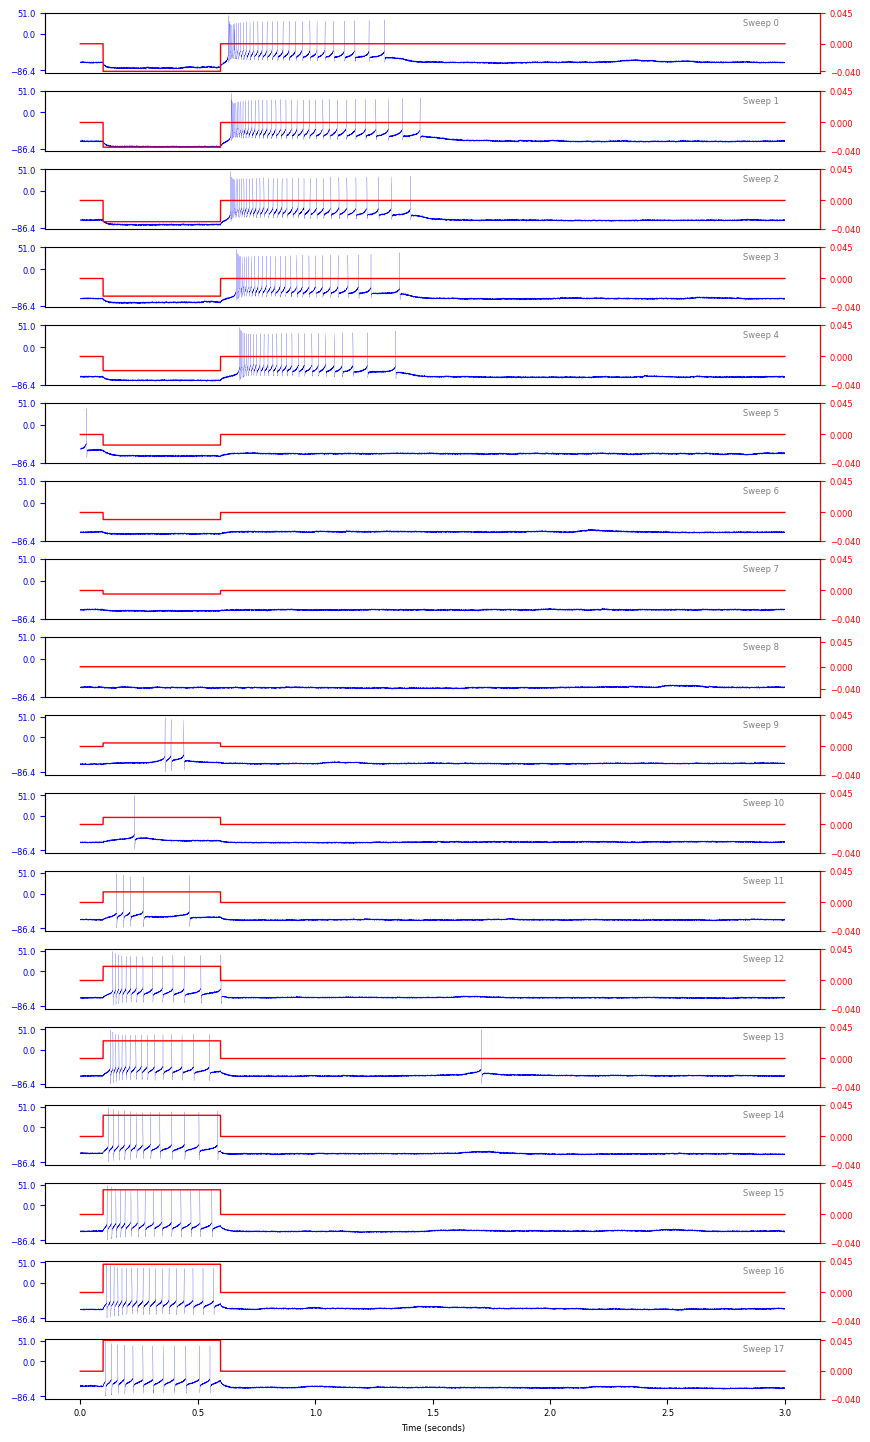

In [68]:
import os
import pyabf
import matplotlib.pyplot as plt
import numpy as np

# Charger le fichier ABF
file_path = "abf_data/Cell1_CC_LHb/23615008.abf"
abf = pyabf.ABF(file_path)

# Initialiser les valeurs globales min et max pour ADC et DAC
global_y_min_left = float('inf')
global_y_max_left = float('-inf')
global_y_min_right = float('inf')
global_y_max_right = float('-inf')

# Trouver les valeurs min et max globales pour tous les sweeps
for sweepNumber in abf.sweepList:
    abf.setSweep(sweepNumber)
    global_y_min_left = min(global_y_min_left, np.min(abf.sweepY))
    global_y_max_left = max(global_y_max_left, np.max(abf.sweepY))
    global_y_min_right = min(global_y_min_right, np.min(abf.sweepC))
    global_y_max_right = max(global_y_max_right, np.max(abf.sweepC))

# Définir le nombre de sous-figures (nombre de sweeps)
n_sweeps = len(abf.sweepList)
fig, axes = plt.subplots(nrows=n_sweeps, ncols=1, figsize=(10, 1 * n_sweeps))

# Assurez-vous que 'axes' soit un tableau, même pour un seul sweep
if n_sweeps == 1:
    axes = [axes]

# Tracer chaque sweep individuellement
for i, sweepNumber in enumerate(abf.sweepList):
    abf.setSweep(sweepNumber)
    ax1 = axes[i]
    ax2 = ax1.twinx()

    # Tracer l'ADC (potentiel de membrane) sur l'axe de gauche
    ax1.plot(abf.sweepX, abf.sweepY, color='b', lw=0.1)  # ADC curve in blue
    ax1.set_yticks([global_y_min_left, 0 if global_y_min_left < 0 < global_y_max_left else None, global_y_max_left])
    ax1.set_yticks([tick for tick in ax1.get_yticks() if tick is not None])  # Remove None values
    ax1.tick_params(axis='y', labelcolor='blue', color='blue', labelsize=6)
    ax1.spines['left'].set_color('r')  # Color the left y-axis blue

    # Tracer le DAC (courant appliqué) sur l'axe de droite
    ax2.plot(abf.sweepX, abf.sweepC, color='r', lw=1)  # DAC curve in red
    ax2.set_yticks([global_y_min_right, 0 if global_y_min_right < 0 < global_y_max_right else None, global_y_max_right])
    ax2.set_yticks([tick for tick in ax2.get_yticks() if tick is not None])  # Remove None values
    ax2.tick_params(axis='y', labelcolor='r', color='r', labelsize=6)
    ax2.spines['right'].set_color('r')  # Color the right y-axis red

    # Ajouter le numéro de sweep comme titre
    ax1.text(0.9, 0.8, f"Sweep {sweepNumber}", transform=ax1.transAxes, fontsize=6, color='gray')

    # Adjust tick label sizes
    ax1.tick_params(axis='x', labelsize=6)  # Adjust the x-axis tick label size

    ax1.spines[['bottom','top']].set_visible(False)

    if i < n_sweeps - 1:
        ax1.xaxis.set_visible(False)  # Suppress x-axis for all but the last subplot
    else:
        ax1.set_xlabel(abf.sweepLabelX, fontsize=6)  # Set x-axis label only for the last subplot     

# Améliorer la mise en page et ajouter de l'espace entre les sous-figures
plt.subplots_adjust(hspace=0.3)
plt.show()


In [2]:
import os
import pyabf
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages  # Import PDF backend

# Charger le fichier ABF
file_path = "abf_data/Cell1_CC_LHb/23615008.abf"
abf = pyabf.ABF(file_path)

# Initialiser les valeurs globales min et max pour ADC et DAC
global_y_min_left = float('inf')
global_y_max_left = float('-inf')
global_y_min_right = float('inf')
global_y_max_right = float('-inf')

# Trouver les valeurs min et max globales pour tous les sweeps
for sweepNumber in abf.sweepList:
    abf.setSweep(sweepNumber)
    global_y_min_left = min(global_y_min_left, np.min(abf.sweepY))
    global_y_max_left = max(global_y_max_left, np.max(abf.sweepY))
    global_y_min_right = min(global_y_min_right, np.min(abf.sweepC))
    global_y_max_right = max(global_y_max_right, np.max(abf.sweepC))

# Définir le nombre de sous-figures (nombre de sweeps)
n_sweeps = len(abf.sweepList)

# Create a single figure for all sweeps
fig, axes = plt.subplots(nrows=n_sweeps, ncols=1, figsize=(10, 1 * n_sweeps))

# Assurez-vous que 'axes' soit un tableau, même pour un seul sweep
if n_sweeps == 1:
    axes = [axes]

# Tracer chaque sweep individuellement
for i, sweepNumber in enumerate(abf.sweepList):
    abf.setSweep(sweepNumber)
    ax1 = axes[i]
    ax2 = ax1.twinx()

    # Tracer l'ADC (potentiel de membrane) sur l'axe de gauche
    ax1.plot(abf.sweepX, abf.sweepY, color='b', lw=0.1)  # ADC curve in blue
    ax1.set_yticks([global_y_min_left, 0 if global_y_min_left < 0 < global_y_max_left else None, global_y_max_left])
    ax1.set_yticks([tick for tick in ax1.get_yticks() if tick is not None])  # Remove None values
    ax1.tick_params(axis='y', labelcolor='blue', color='blue', labelsize=6)
    ax1.spines['left'].set_color('b')  # Color the left y-axis blue

    # Tracer le DAC (courant appliqué) sur l'axe de droite
    ax2.plot(abf.sweepX, abf.sweepC, color='r', lw=1)  # DAC curve in red
    ax2.set_yticks([global_y_min_right, 0 if global_y_min_right < 0 < global_y_max_right else None, global_y_max_right])
    ax2.set_yticks([tick for tick in ax2.get_yticks() if tick is not None])  # Remove None values
    ax2.tick_params(axis='y', labelcolor='r', color='r', labelsize=6)
    ax2.spines['right'].set_color('r')  # Color the right y-axis red

    # Ajouter le numéro de sweep comme titre
    ax1.text(0.9, 0.8, f"Sweep {sweepNumber}", transform=ax1.transAxes, fontsize=6, color='gray')

    # Adjust tick label sizes
    ax1.tick_params(axis='x', labelsize=6)  # Adjust the x-axis tick label size
    ax1.spines[['bottom', 'top']].set_visible(False)  # Hide the bottom and top spines

    if i < n_sweeps - 1:
        ax1.xaxis.set_visible(False)  # Suppress x-axis for all but the last subplot
    else:
        ax1.set_xlabel(abf.sweepLabelX, fontsize=6)  # Set x-axis label only for the last subplot     

# Save the entire figure as a single page PDF
pdf_file_path = "sweeps_plots_single_page.pdf"
plt.savefig(pdf_file_path, bbox_inches='tight')  # Save the figure
plt.close(fig)  # Close the figure to free up memory

# Optionally, you can print a message to indicate the PDF has been created
print(f"PDF saved as {pdf_file_path}")


PDF saved as sweeps_plots_single_page.pdf


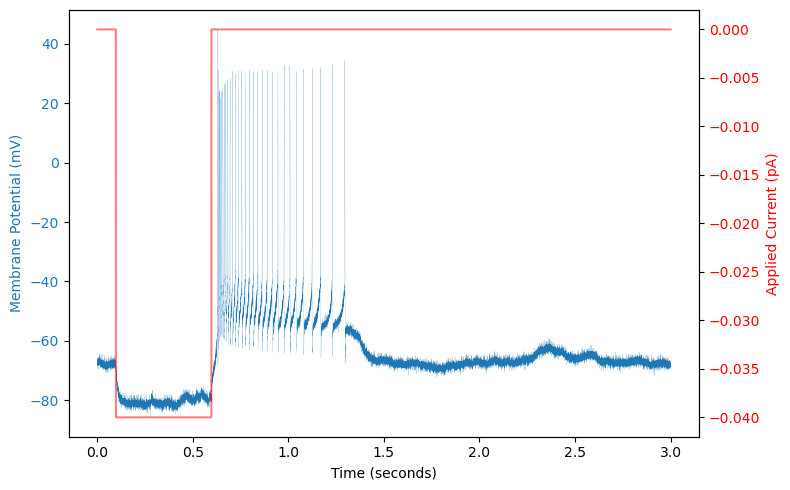

In [14]:
import pyabf
import matplotlib.pyplot as plt

# Charger le fichier ABF
file_path = "abf_data/Cell1_CC_LHb/23615008.abf"
abf = pyabf.ABF(file_path)

# Créer la figure
fig, ax1 = plt.subplots(figsize=(8, 5))

# Tracer la courbe enregistrée (ADC) sur l'axe de gauche
ax1.plot(abf.sweepX, abf.sweepY, color='C0', label="ADC waveform",lw=0.1)
ax1.set_xlabel(abf.sweepLabelX)
ax1.set_ylabel(abf.sweepLabelY, color='C0')
ax1.tick_params(axis='y', labelcolor='C0')

# Créer un second axe y pour la courbe de commande (DAC)
ax2 = ax1.twinx()
ax2.plot(abf.sweepX, abf.sweepC, color='r', label="DAC waveform",alpha=0.5)
ax2.set_ylabel(abf.sweepLabelC, color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Améliorer la mise en page
fig.tight_layout()
plt.show()


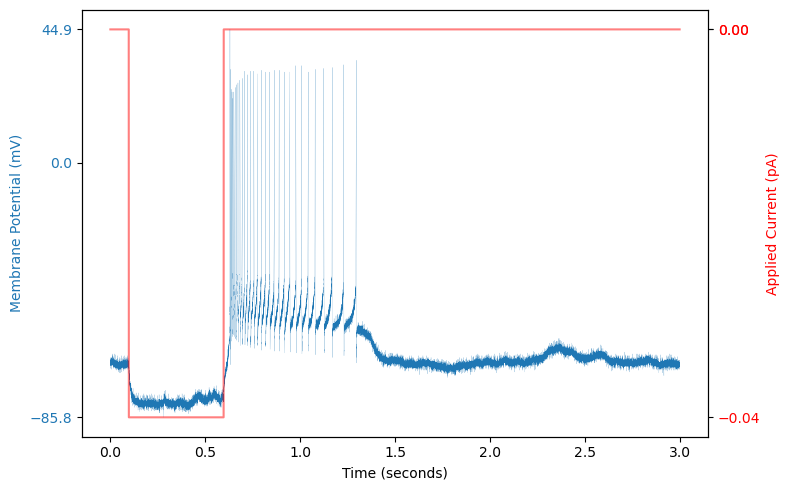

In [15]:
import pyabf
import matplotlib.pyplot as plt

# Charger le fichier ABF
file_path = "abf_data/Cell1_CC_LHb/23615008.abf"
abf = pyabf.ABF(file_path)

# Créer la figure
fig, ax1 = plt.subplots(figsize=(8, 5))

# Tracer la courbe enregistrée (ADC) sur l'axe de gauche
ax1.plot(abf.sweepX, abf.sweepY, color='C0', label="ADC waveform", lw=0.1)
ax1.set_xlabel(abf.sweepLabelX)
ax1.set_ylabel(abf.sweepLabelY, color='C0')
ax1.tick_params(axis='y', labelcolor='C0')

# Définir les valeurs des ticks y pour l'axe gauche
y_min, y_max = min(abf.sweepY), max(abf.sweepY)
ticks_left = [tick for tick in [y_min, 0, y_max] if y_min <= tick <= y_max]
ax1.set_yticks(ticks_left)

# Créer un second axe y pour la courbe de commande (DAC)
ax2 = ax1.twinx()
ax2.plot(abf.sweepX, abf.sweepC, color='r', label="DAC waveform", alpha=0.5)
ax2.set_ylabel(abf.sweepLabelC, color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Définir les valeurs des ticks y pour l'axe droit
c_min, c_max = min(abf.sweepC), max(abf.sweepC)
ticks_right = [tick for tick in [c_min, 0, c_max] if c_min <= tick <= c_max]
ax2.set_yticks(ticks_right)

# Améliorer la mise en page
fig.tight_layout()
plt.show()


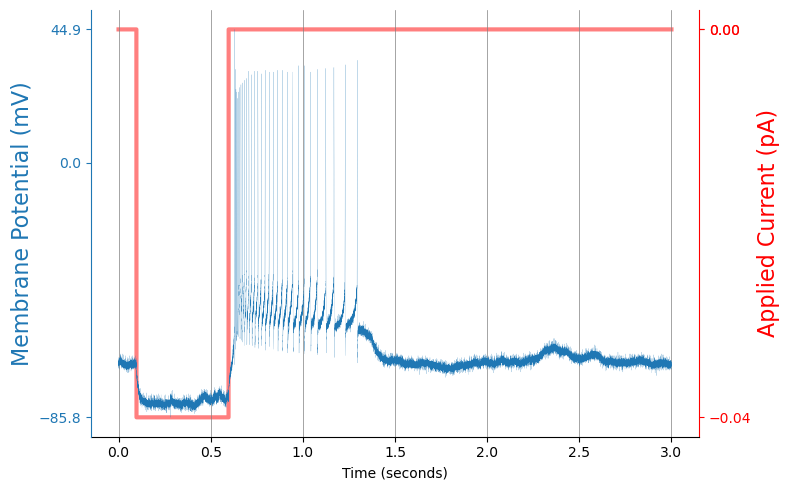

In [11]:
import pyabf
import matplotlib.pyplot as plt

# Apply the style before creating the plot
#plt.style.use('bmh')


# --- Charger le fichier ABF ---------------------------------------

file_path = "abf_data/Cell1_CC_LHb/23615008.abf"
abf = pyabf.ABF(file_path)

# --- Créer la figure ----------------------------------------------

fig, ax1 = plt.subplots(figsize=(8, 5))

# --- ax1 ----------------------------------------------------------

# Tracer la courbe enregistrée (ADC) sur l'axe de gauche
ax1.plot(abf.sweepX, abf.sweepY, color='C0', label="ADC waveform", lw=0.1)
ax1.set_xlabel(abf.sweepLabelX)
ax1.set_ylabel(abf.sweepLabelY, color='C0',fontsize=16)
ax1.tick_params(axis='y', labelcolor='C0', color='C0')

# Changer la couleur du spine gauche
ax1.spines['left'].set_color('C0')
ax1.spines[['right','top','bottom']].set_visible(False)

# Définir les valeurs des ticks y pour l'axe gauche
y_min, y_max = min(abf.sweepY), max(abf.sweepY)
ticks_left = [tick for tick in [y_min, 0, y_max] if y_min <= tick <= y_max]
ax1.set_yticks(ticks_left)


# --- ax2 ----------------------------------------------------------

# Créer un second axe y pour la courbe de commande (DAC)
ax2 = ax1.twinx()
ax2.plot(abf.sweepX, abf.sweepC, color='r', label="DAC waveform", lw=3, alpha=0.5)
ax2.set_ylabel(abf.sweepLabelC, color='r',fontsize=16)
ax2.tick_params(axis='y', labelcolor='r', color='r')

# Changer la couleur du spine droit
ax2.spines['right'].set_color('r')
ax2.spines[['left','top']].set_visible(False)

# Définir les valeurs des ticks y pour l'axe droit
c_min, c_max = min(abf.sweepC), max(abf.sweepC)
ticks_right = [tick for tick in [c_min, 0, c_max] if c_min <= tick <= c_max]
ax2.set_yticks(ticks_right)

# --- Améliorer la mise en page --------------------------------------

# Ajouter une grille pour l'axe x (derrière les tracés)
ax1.xaxis.grid(True, which='both', color='gray', linestyle='-', linewidth=0.5, zorder=0)


#ax1.set_zorder(2)
#ax2.set_zorder(1)

ax1.set_zorder(2)
ax2.set_zorder(1)
ax1.patch.set_visible(False)

fig.tight_layout()
plt.show()


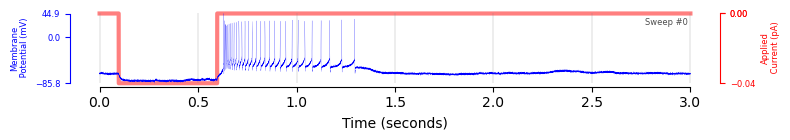

In [12]:
import pyabf
import matplotlib.pyplot as plt
import numpy as np

# Apply the style before creating the plot
# plt.style.use('bmh')

# --- Charger le fichier ABF ---------------------------------------

file_path = "abf_data/Cell1_CC_LHb/23615008.abf"
abf = pyabf.ABF(file_path)

c_min, c_max = min(abf.sweepC), max(abf.sweepC)
t_min, t_max = min(abf.sweepX), max(abf.sweepX)
y_min, y_max = min(abf.sweepY), max(abf.sweepY)

# --- Paramètres ---------------------------------------------------

fig_height, fig_width = 1.5, 8
y_label_font_size = 6
adc_lw, dac_lw = 0.1, 3
adc_col, dac_col = 'b', 'r'
tick_label_font_size = 6

# --- Créer la figure ----------------------------------------------

fig, ax1 = plt.subplots(figsize=(fig_width, fig_height))

# --- ax1 ----------------------------------------------------------

# Tracer la courbe enregistrée (ADC) sur l'axe de gauche
ax1.plot(abf.sweepX, abf.sweepY, color=adc_col, label="ADC waveform", lw=adc_lw)
ax1.set_xlabel(abf.sweepLabelX)
part1_length = 8
ax1.set_ylabel(f"{abf.sweepLabelY[:part1_length]}\n{abf.sweepLabelY[part1_length:]}", color=adc_col, fontsize=y_label_font_size)
ax1.tick_params(axis='y', labelcolor=adc_col, color=adc_col, labelsize=tick_label_font_size)

# Définir les valeurs des ticks y pour l'axe gauche
ticks_left = [tick for tick in [y_min, 0, y_max] if y_min <= tick <= y_max]
ax1.set_yticks(ticks_left)

# Changer la couleur du spine gauche
ax1.spines['left'].set_color(adc_col)
ax1.spines[['right', 'top', 'bottom']].set_visible(False)
ax1.spines['left'].set_bounds(y_min, y_max)

# sweep number
sweep_text = f"Sweep #{abf.sweepNumber}"
ax1.text(0.95, 0.9, sweep_text, transform=ax1.transAxes,
         fontsize=tick_label_font_size, color='k', ha='right', va='top', alpha=0.7)

# --- ax2 ----------------------------------------------------------

# Créer un second axe y pour la courbe de commande (DAC)
ax2 = ax1.twinx()
ax2.plot(abf.sweepX, abf.sweepC, color=dac_col, label="DAC waveform", lw=dac_lw, alpha=0.5)
#ax2.set_ylabel(abf.sweepLabelC, color=dac_col, fontsize=y_label_font_size)
part2_length = 7
ax2.set_ylabel(f"{abf.sweepLabelC[:part2_length]}\n{abf.sweepLabelC[part2_length:]}", color=dac_col, fontsize=y_label_font_size)
ax2.tick_params(axis='y', labelcolor=dac_col, color=dac_col, labelsize=tick_label_font_size)

# Définir les valeurs des ticks y pour l'axe droit
ticks_right = [tick for tick in [c_min, 0, c_max] if c_min <= tick <= c_max]
ax2.set_yticks(ticks_right)

# Changer la couleur du spine droit
ax2.spines['right'].set_color(dac_col)
ax2.spines[['left', 'top']].set_visible(False)
ax2.spines['bottom'].set_bounds(min(abf.sweepX), max(abf.sweepX))
ax2.spines['right'].set_bounds(c_min, c_max)
ax2.spines['bottom'].set_bounds(t_min, t_max)

# --- Améliorer la mise en page --------------------------------------

x_positions = np.linspace(0, 3, 7)  # Adjust the start, end, and number of lines as needed
for x in x_positions:
    ax1.vlines(x, ymin=-85.8, ymax=44.9, color='gray', linestyle='-', linewidth=0.2, zorder=0)

ax1.set_zorder(2)
ax2.set_zorder(1)
ax1.patch.set_visible(False)

fig.tight_layout()
plt.show()

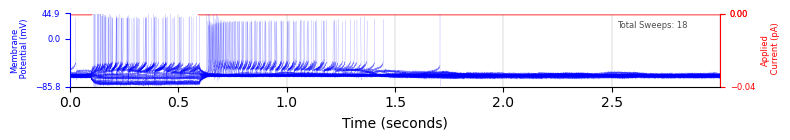

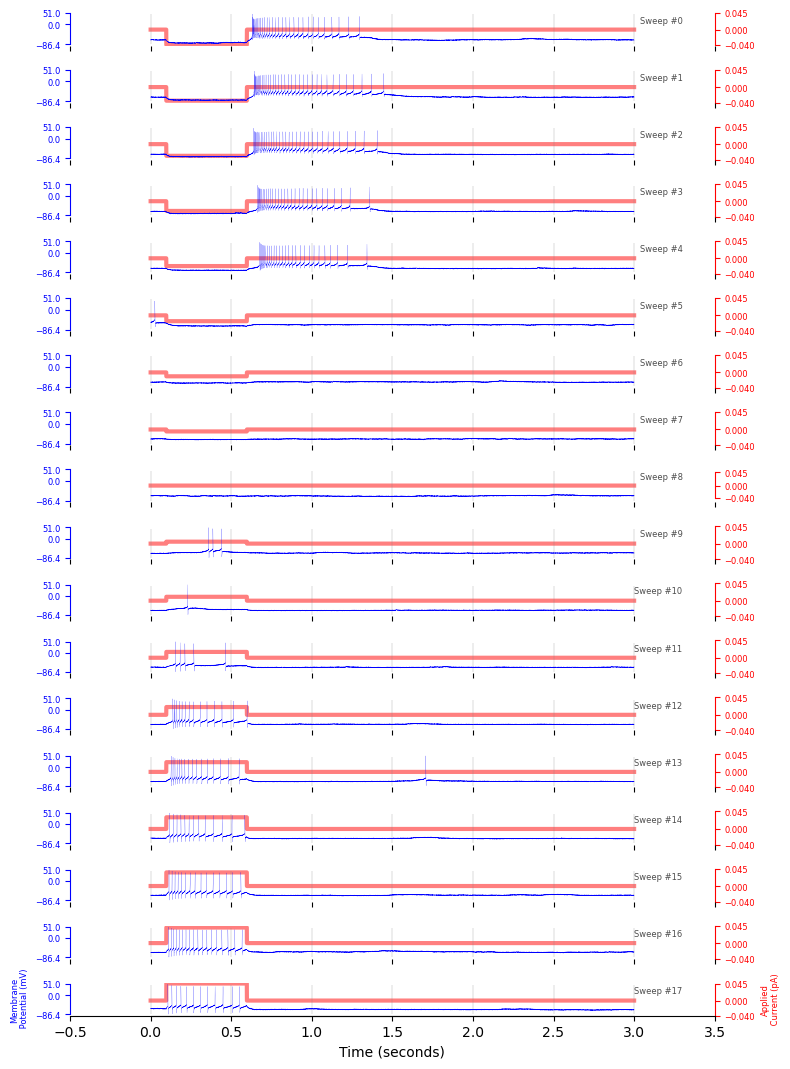

In [5]:
import pyabf
import matplotlib.pyplot as plt
import numpy as np

# Charger le fichier ABF
file_path = "abf_data/Cell1_CC_LHb/23615008.abf"
abf = pyabf.ABF(file_path)

# Paramètres de style
fig_width, fig_height = 8, 0.6
y_label_font_size = 6
adc_lw, dac_lw = 0.1, 3
adc_col, dac_col = 'b', 'r'
tick_label_font_size = 6


# Initialiser les variables de min/max globaux
c_min, c_max = float('inf'), float('-inf')
y_min, y_max = float('inf'), float('-inf')

# Parcourir tous les balayages pour trouver les valeurs globales
for sweep in range(abf.sweepCount):
    abf.setSweep(sweep)
    c_min = min(c_min, min(abf.sweepC))
    c_max = max(c_max, max(abf.sweepC))
    y_min = min(y_min, min(abf.sweepY))
    y_max = max(y_max, max(abf.sweepY))

# Définir t_min et t_max basés sur le premier balayage (ils ne changent pas)
t_min, t_max = min(abf.sweepX), max(abf.sweepX)


# Créer une figure avec des sous-figures verticales pour chaque balayage
fig, axes = plt.subplots(abf.sweepCount, 1, figsize=(fig_width, fig_height * abf.sweepCount), sharex=True)

for sweep in range(abf.sweepCount):
    abf.setSweep(sweep)
    ax1 = axes[sweep]

    # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

    # --- ax1 ----------------------------------------------------------

    # Tracer la courbe enregistrée (ADC) sur l'axe de gauche
    ax1.plot(abf.sweepX, abf.sweepY, color=adc_col, label="ADC waveform", lw=adc_lw)
    ax1.tick_params(axis='y', labelcolor=adc_col, color=adc_col, labelsize=tick_label_font_size)

    # Définir les valeurs des ticks y pour l'axe gauche
    ticks_left = [tick for tick in [y_min, 0, y_max] if y_min <= tick <= y_max]
    ax1.set_yticks(ticks_left)

    # spines
    ax1.spines['left'].set_color(adc_col)                     # spine gauche bleu
    ax1.spines[['right', 'top', 'bottom']].set_visible(False) # les autres non visibles
    ax1.spines['left'].set_bounds(y_min, y_max)               # bornes du spine

    # sweep number
    sweep_text = f"Sweep #{abf.sweepNumber}"
    ax1.text(0.95, 0.9, sweep_text, transform=ax1.transAxes,
         fontsize=tick_label_font_size, color='k', ha='right', va='top', alpha=0.7)

    # --- ax2 ----------------------------------------------------------

    # Créer un second axe y pour la courbe de commande (DAC)
    ax2 = ax1.twinx()
    ax2.plot(abf.sweepX, abf.sweepC, color=dac_col, label="DAC waveform", lw=dac_lw, alpha=0.5)
    ax2.tick_params(axis='y', labelcolor=dac_col, color=dac_col, labelsize=tick_label_font_size)

    # Définir les valeurs des ticks y pour l'axe droit
    ticks_right = [tick for tick in [c_min, 0, c_max] if c_min <= tick <= c_max]
    ax2.set_yticks(ticks_right)

    # spines
    ax2.spines['right'].set_color(dac_col)                   # spine droit rouge
    ax2.spines[['left', 'top', 'bottom']].set_visible(False) # les autres non visibles
    ax2.spines['right'].set_bounds(c_min, c_max)             # les bornes des spines
    ax2.spines['bottom'].set_bounds(t_min, t_max)            # 

    # --- only the last sweep with x label -------------------------------
    
    if sweep == abf.sweepCount-1:
        ax1.set_xticks(ax1.get_xticks())  # Make sure to set the x-ticks visible
        ax1.set_xlabel(abf.sweepLabelX)   # Set the x-label for the last sweep
        ax2.spines['bottom'].set_visible(True)
        ax1.spines['bottom'].set_visible(True)
    #else:
    #    ax1.set_xlabel("")  # no xlabel (ici "Time (seconds)")
    #    ax1.set_xticks([])  # Hide x-ticks for all but the last sweep

    # --- Améliorer la mise en page --------------------------------------

    x_positions = np.linspace(0, 3, 7)  # Adjust the start, end, and number of lines as needed
    for x in x_positions:
        ax1.vlines(x, ymin=-85.8, ymax=44.9, color='gray', linestyle='-', linewidth=0.2, zorder=0)
        #ax1.vlines(x, ymin=y_min, ymax=y_max, color='gray', linestyle='-', linewidth=0.2, zorder=0)

    ax1.set_zorder(2)
    ax2.set_zorder(1)
    ax1.patch.set_visible(False)

    # >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
    

ax1.set_xticks(ax1.get_xticks())  # Make sure to set the x-ticks visible
ax1.set_xlabel(abf.sweepLabelX)   # Set the x-label for the last sweep
ax2.spines['bottom'].set_visible(True)
ax2.spines['bottom'].set_bounds(min(abf.sweepX), max(abf.sweepX))

part1_length = 8
ax1.set_ylabel(f"{abf.sweepLabelY[:part1_length]}\n{abf.sweepLabelY[part1_length:]}", color=adc_col, fontsize=y_label_font_size)
part2_length = 7
ax2.set_ylabel(f"{abf.sweepLabelC[:part2_length]}\n{abf.sweepLabelC[part2_length:]}", color=dac_col, fontsize=y_label_font_size)


# Mise en page
fig.tight_layout()
plt.show()


In [4]:
ax1.get_xticks()

array([-0.5,  0. ,  0.5, ...,  2.5,  3. ,  3.5])